In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# 1. Data exploration & cleaning

In [2]:
url = 'https://github.com/VasetoNG/final-project-dataset/blob/main/mental-heath-in-tech-2016_20161114.csv?raw=true'

In [3]:
df_raw = pd.read_csv(url)

In [4]:
df_to_use = df_raw.copy()

In [5]:
df_to_use.head(3)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always


In [6]:
df_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [7]:
df_to_use.shape

(1433, 63)

In [8]:
# check numeric variables
print(df_to_use.describe())

       Are you self-employed?  \
count             1433.000000   
mean                 0.200279   
std                  0.400349   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       Is your employer primarily a tech company/organization?  \
count                                        1146.000000         
mean                                            0.770506         
std                                             0.420691         
min                                             0.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

       Is your primary role within your company related to tech/IT?  \
count                               

### 1.1 Dealing with missing values

In [9]:
# check missing values
df_to_use.isnull().sum()[df_to_use.isnull().sum()!=0]

How many employees does your company or organization have?                                                                                                                           287
Is your employer primarily a tech company/organization?                                                                                                                              287
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    287
Do you know the options for mental health care available under your employer-provided coverage?                                                                                      420
Has your employer ever formally discussed mental health (for example, as pa

In [10]:
# check missing values in percentage
df_to_use.isnull().sum()[df_to_use.isnull().sum()!=0]/len(df_to_use)

How many employees does your company or organization have?                                                                                                                          0.200279
Is your employer primarily a tech company/organization?                                                                                                                             0.200279
Is your primary role within your company related to tech/IT?                                                                                                                        0.816469
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                   0.200279
Do you know the options for mental health care available under your employer-provided coverage?                                                                                     0.293091
Has your employer ever formally discussed mental health

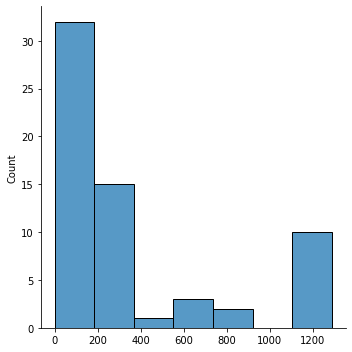

In [11]:
sns.displot(df_to_use.isnull().sum())

##### The features which have 20% missing values seems to capture an important info, so I will not drop them. Will drop only the features which have more than 21% missing values.

In [12]:
# Dropping the columns with more than 21 % missing values
na_percent = df_to_use.isnull().sum()[df_to_use.isnull().sum()!=0]/len(df_to_use)
missing_val = na_percent[na_percent > 0.21].index
df_to_use.drop(missing_val, axis=1, inplace=True)


In [13]:
df_to_use.shape

(1433, 45)

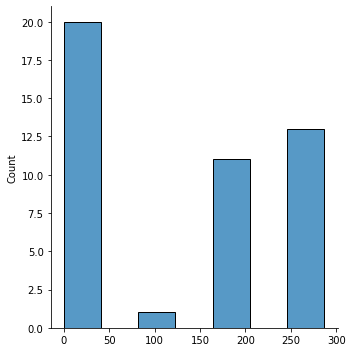

In [14]:
sns.displot(df_to_use.isnull().sum())

### 1.2 Dealing with outliers


Text(0.5, 1.0, 'With outliers')

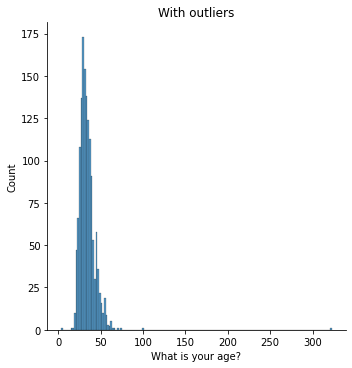

In [15]:
sns.displot(data=df_to_use, x="What is your age?")
plt.title("With outliers")

##### The Age column has irrelevant values (max age is 323, min age is 3.). Will calculate the average age between 18 & 75 and will assign the average age to the weird entries.

In [16]:
# get the average age between 18 and 75
mean_age = df_to_use[(df_to_use['What is your age?'] >= 18) | (df_to_use['What is your age?'] <= 75)]['What is your age?'].mean()
mean_age = int(mean_age)
mean_age

34

In [17]:
# replace the wired values with the calculated average age
df_to_use['What is your age?'].replace(to_replace = df_to_use[(df_to_use['What is your age?'] < 18) | (df_to_use['What is your age?'] > 75)]['What is your age?'].tolist(),
                          value = mean_age, inplace = True)

Text(0.5, 1.0, 'Without outliers')

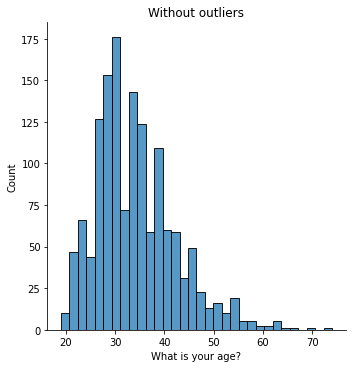

In [18]:
sns.displot(data=df_to_use, x="What is your age?")
plt.title("Without outliers")

In [19]:
## remove outliers
# df_to_use["age"] = df_to_use["What is your age?"]
# df_to_use_no_outliers = df_to_use[(18 < df_to_use["age"])  & (65 >= df_to_use["age"])]
# sns.displot(data=df_to_use_no_outliers, x="What is your age?")
# plt.title("Without outliers")

In [20]:
df_to_use_no_outliers = df_to_use
df_to_use_no_outliers.shape

(1433, 45)

### 1.3 Dealing with the gender column

In [21]:
# get all diferent entries in the gender column
values_gender = df_to_use_no_outliers["What is your gender?"].value_counts().sort_values(ascending=False).to_frame()
values_gender = values_gender.rename(columns={'What is your gender?': 'count'})
with pd.option_context('display.max_rows', None):
     display(values_gender)

,count
Male,610
male,249
Female,153
female,95
M,86
m,79
F,38
f,23
Male,11
Female,9


In [22]:
# Create gender lists for male, female and other
ls_male = ['Male','male', 'Male ', 'M', 'm', 'man', 'Cis male','Male.', 'Male (cis)', 'Man', 'Sex is male',
           'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
           'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
           'cisdude', 'cis man', 'MALE']

ls_female = ['Female','female', 'I identify as female.', 'female ', 'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
             'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman', 'Cisgender Female', 
             'mtf', 'fem', 'Female (props for making this a freeform field, though)', ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
             'Cis female ']          

ls_other = ['non-binary', 'Agender', 'Nonbinary', 'Fluid', 'human', 'Unicorn', 'Genderqueer', 'Genderflux demi-girl', 'Male/genderqueer',
         'female-bodied; no feelings about gender', 'Queer', 'none of your business', 'genderqueer woman', 'Bigender',
         'Genderfluid (born female)', 'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly', 'nb masculine', 'genderqueer',
         'Human', 'Genderfluid', 'Other', 'Enby']

In [23]:
# Replace all the diverse gender entries with male, female and others
df_to_use_no_outliers['What is your gender?'].loc[df_to_use_no_outliers['What is your gender?'].isin(ls_male)] = 'male'
df_to_use_no_outliers['What is your gender?'].loc[df_to_use_no_outliers['What is your gender?'].isin(ls_female)] = 'female'
df_to_use_no_outliers['What is your gender?'].loc[df_to_use_no_outliers['What is your gender?'].isin(ls_other)] = 'others'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
# Check if the gender column consists only from male, female and others
df_to_use_no_outliers["What is your gender?"].value_counts().sort_values(ascending=False)

male      1058
female     343
others      29
Name: What is your gender?, dtype: int64

In [25]:
# Check if there are missing values in gender
df_to_use_no_outliers['What is your gender?'].isnull().sum()

3

In [26]:
# Fill the three missing values with others
df_to_use_no_outliers = df_to_use_no_outliers.fillna({'What is your gender?':'others'})

In [27]:
# Check if there are missing values in gender after filling the missing values
df_to_use_no_outliers['What is your gender?'].isnull().sum()

0

### 1.4 Renaming the columns 

In [28]:
# names of the columns
print(df_to_use_no_outliers.columns)

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Do you think that discussing a physical health issue with your employer would hav

In [29]:
new_column_name = ['self-employed', 'no_employees', 'tech_company', 'mh_benefits', 'mh_wellness_campaign', 'mhd_offered_resources',
                   'protected_anonymity', 'mhd_medical_leave', 'mhd_employer_discussion_neg_csq', 'ph_employer_discussion_neg_csq', 
                   'mhd_coworkers_discussion', 'mhd_supervisor_discussion', 'mhd_seriousness_employer', 'mhd_neg_conseq_coworkers', 
                   'prev_employers', 'prev_employers_mhd_benefits', 'prev_mhd_care_communication', 'prev_employer_mhd_wellness_campaign', 
                   'prev_mhd_resources', 'prev_protedted_anonymity', 'prev_mhd_employer_discussion_impact','prev_ph_employer_discussion_impact', 
                   'prev_mhd_coworkers_discussion', 'prev_mhd_supervisor_discussion', 'prev_employer_mhd_seriousness', 
                   'prev_mhd_neg_csq_coworkers', 'ph_interview', 'mhd_interview', 'mhd_career_impact', 'mhd_and_coworker_behavior', 'mhd_sharing_family_friends', 
                   'mhd_unsupportive_response', 'mhd_family_history', 'mhd_in_the_past', 'mhd_currently', 'mhd_diagnosis', 'mhd_treatment', 
                   'mh_work_interfere_treatment', 'mh_work_interfere', 'age', 'gender', 'live_in_country', 'work_in_country', 'work_position', 'remote_work']

df_to_use_no_outliers.columns = new_column_name


In [30]:
df_to_use_no_outliers.sample(10)

,self-employed,no_employees,tech_company,mh_benefits,mh_wellness_campaign,mhd_offered_resources,protected_anonymity,mhd_medical_leave,mhd_employer_discussion_neg_csq,ph_employer_discussion_neg_csq,...,mhd_diagnosis,mhd_treatment,mh_work_interfere_treatment,mh_work_interfere,age,gender,live_in_country,work_in_country,work_position,remote_work
187,0,100-500,1.0,Yes,I don't know,Yes,Yes,Somewhat difficult,No,No,...,No,1,Not applicable to me,Not applicable to me,34,female,United States of America,United States of America,Other|HR,Never
245,0,6-25,1.0,I don't know,No,I don't know,I don't know,Neither easy nor difficult,Maybe,Maybe,...,Yes,1,Sometimes,Sometimes,37,female,United States of America,United States of America,Other,Sometimes
1132,0,100-500,1.0,I don't know,No,I don't know,I don't know,Somewhat difficult,Maybe,No,...,Yes,1,Often,Often,25,female,United States of America,United States of America,Back-end Developer,Sometimes
490,0,6-25,1.0,No,No,No,I don't know,Somewhat difficult,Maybe,Maybe,...,Yes,1,Sometimes,Sometimes,43,male,United States of America,United States of America,Front-end Developer|Back-end Developer,Always
403,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,1,Rarely,Sometimes,31,female,United States of America,United States of America,One-person shop|Designer|Front-end Developer|B...,Always
731,0,More than 1000,0.0,I don't know,No,I don't know,I don't know,Neither easy nor difficult,No,No,...,Yes,1,Sometimes,Sometimes,28,male,United Kingdom,United Kingdom,Back-end Developer,Never
864,0,6-25,1.0,I don't know,No,I don't know,I don't know,Very easy,No,No,...,Yes,1,Sometimes,Sometimes,31,male,United States of America,United States of America,Back-end Developer,Never
572,0,More than 1000,1.0,Yes,Yes,I don't know,Yes,Very easy,No,No,...,No,0,Not applicable to me,Not applicable to me,29,male,United States of America,United States of America,DevOps/SysAdmin,Never
1355,0,100-500,1.0,No,No,No,No,Somewhat difficult,Maybe,Maybe,...,Yes,1,Not applicable to me,Often,37,male,Pakistan,Pakistan,Supervisor/Team Lead,Sometimes
90,0,100-500,0.0,No,No,No,I don't know,I don't know,Maybe,No,...,Yes,1,Never,Sometimes,33,male,Brazil,Brazil,Other,Never


### 1.5 Renaming United States of America to USA and United Kingdom to UK

In [31]:
df_to_use_no_outliers['live_in_country'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df_to_use_no_outliers['live_in_country'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df_to_use_no_outliers['work_in_country'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df_to_use_no_outliers['work_in_country'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

In [32]:
df_to_use_no_outliers

,self-employed,no_employees,tech_company,mh_benefits,mh_wellness_campaign,mhd_offered_resources,protected_anonymity,mhd_medical_leave,mhd_employer_discussion_neg_csq,ph_employer_discussion_neg_csq,...,mhd_diagnosis,mhd_treatment,mh_work_interfere_treatment,mh_work_interfere,age,gender,live_in_country,work_in_country,work_position,remote_work
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,No,...,Yes,0,Not applicable to me,Not applicable to me,39,male,UK,UK,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Somewhat easy,No,No,...,Yes,1,Rarely,Sometimes,29,male,USA,USA,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,No,1,Not applicable to me,Not applicable to me,38,male,UK,UK,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,1,Sometimes,Sometimes,43,male,UK,UK,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Yes,1,Sometimes,Sometimes,43,female,USA,USA,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,1,Not applicable to me,Not applicable to me,34,female,USA,USA,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,0,Sometimes,Often,56,male,USA,Afghanistan,Support,Sometimes
1430,0,100-500,1.0,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,Maybe,...,Yes,1,Rarely,Sometimes,52,male,USA,USA,Back-end Developer,Sometimes
1431,0,100-500,0.0,I don't know,No,Yes,I don't know,Somewhat difficult,Maybe,No,...,Yes,0,Sometimes,Often,30,female,USA,USA,DevOps/SysAdmin,Sometimes


# 2. EDA

### 2.1 Have you ever sought treatment for a mental health issue from a mental health professional?

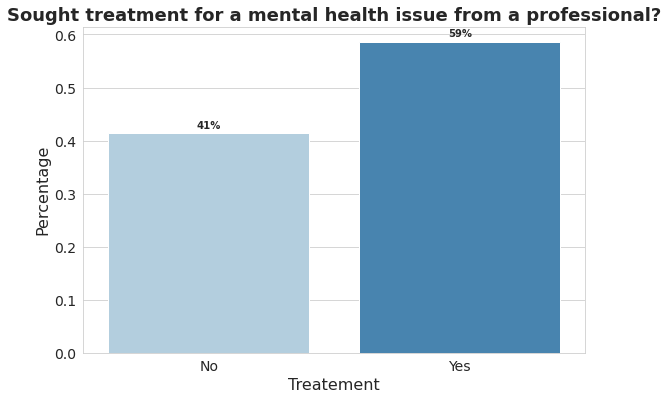

In [33]:
treatment_percentage = df_to_use_no_outliers['mhd_treatment'].value_counts(normalize = True).rename_axis('mhd_treatment').reset_index(name = 'Percentage')

plt.figure(figsize = (9,6))
sns.set_style("whitegrid")
ax = sns.barplot(data = treatment_percentage, x = 'mhd_treatment', y = 'Percentage', palette='Blues')
plt.title('Sought treatment for a mental health issue from a professional?', fontsize=18, fontweight='bold')
plt.xlabel('Treatement', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels(labels=['No', 'Yes'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [34]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height() * 1.02), ha='center', fontweight='bold')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


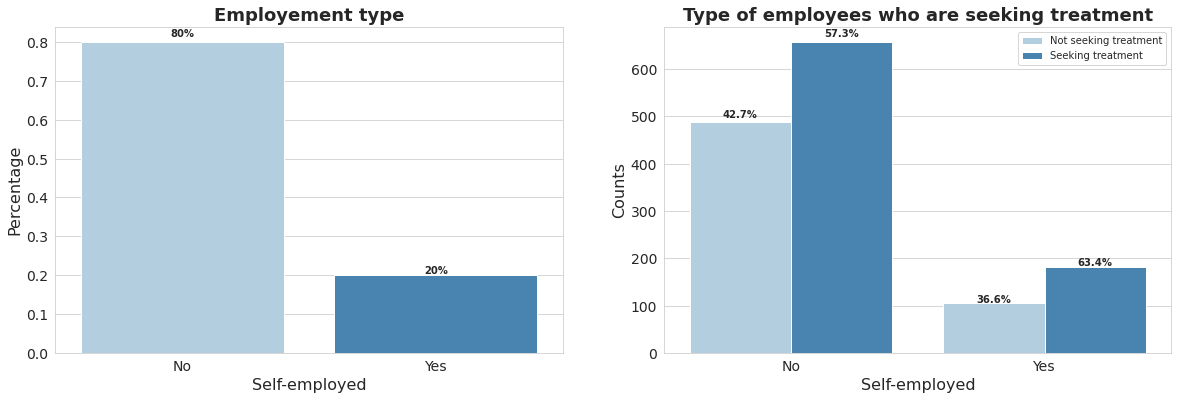

In [35]:
# Type of employers vs treatment

employment_percentage = df_to_use_no_outliers['self-employed'].value_counts(normalize = True).rename_axis('self-employed').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'self-employed', y = 'Percentage', data = employment_percentage, palette = 'Blues')
ax.set_xticklabels(labels=['No', 'Yes'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement type', fontsize=18, fontweight='bold')
plt.xlabel('Self-employed', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['self-employed'], hue = df_to_use_no_outliers['mhd_treatment'], palette = 'Blues')
ax1.set_xticklabels(labels=['No', 'Yes'])
plt.title('Type of employees who are seeking treatment',  fontsize=18, fontweight='bold')
plt.xlabel('Self-employed', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Not seeking treatment', 'Seeking treatment'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

In [36]:
df_to_use_no_outliers['tech_company'].isna().sum()

287

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


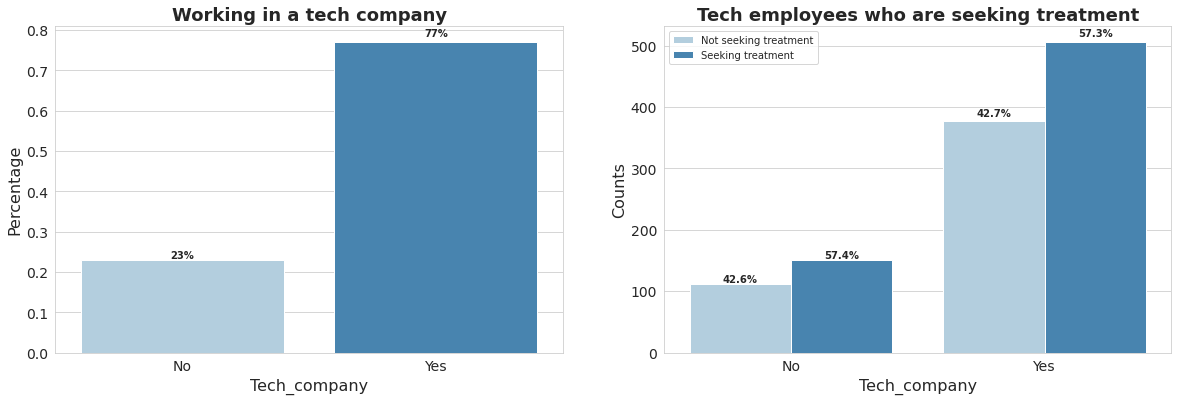

In [37]:
#Is your employer primarily a tech company/organization? Vs treatment
tech_percentage = df_to_use_no_outliers['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = tech_percentage, palette = 'Blues')
ax.set_xticklabels(labels=['No', 'Yes'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working in a tech company', fontsize=18, fontweight='bold')
plt.xlabel('Tech_company', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['tech_company'], hue = df_to_use_no_outliers['mhd_treatment'], palette = 'Blues')
ax1.set_xticklabels(labels=['No', 'Yes'])
plt.title('Tech employees who are seeking treatment',  fontsize=18, fontweight='bold')
plt.xlabel('Tech_company', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Not seeking treatment', 'Seeking treatment'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

In [38]:
df_to_use_no_outliers['remote_work'].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


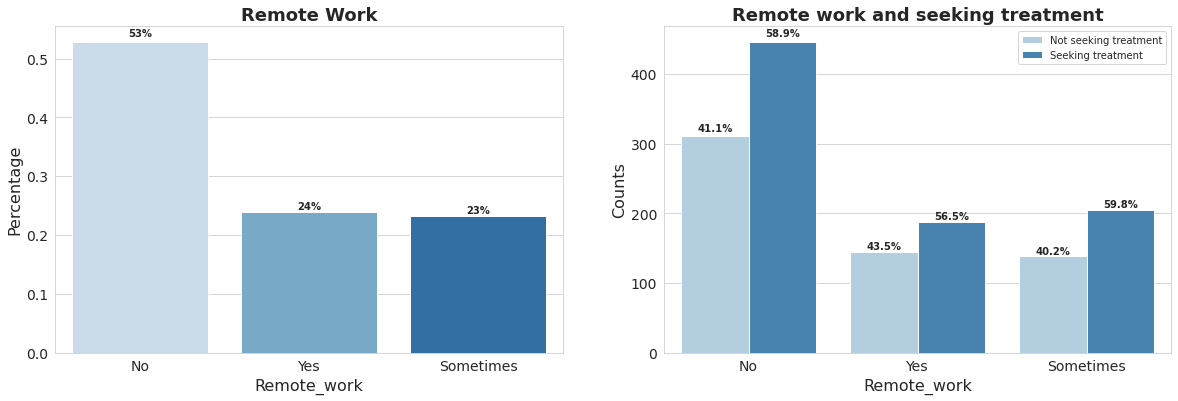

In [39]:
#Do you work remotely? Vs Treatment
remote_percentage = df_to_use_no_outliers['remote_work'].value_counts(normalize = True).rename_axis('Remote_work').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'Remote_work', y = 'Percentage', data = remote_percentage, palette = 'Blues')
ax.set_xticklabels(labels=['No', 'Yes', 'Sometimes'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Remote Work', fontsize=18, fontweight='bold')
plt.xlabel('Remote_work', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['remote_work'], hue = df_to_use_no_outliers['mhd_treatment'], palette = 'Blues')
ax1.set_xticklabels(labels=['No', 'Yes', 'Sometimes'])
plt.title('Remote work and seeking treatment',  fontsize=18, fontweight='bold')
plt.xlabel('Remote_work', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Not seeking treatment', 'Seeking treatment'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


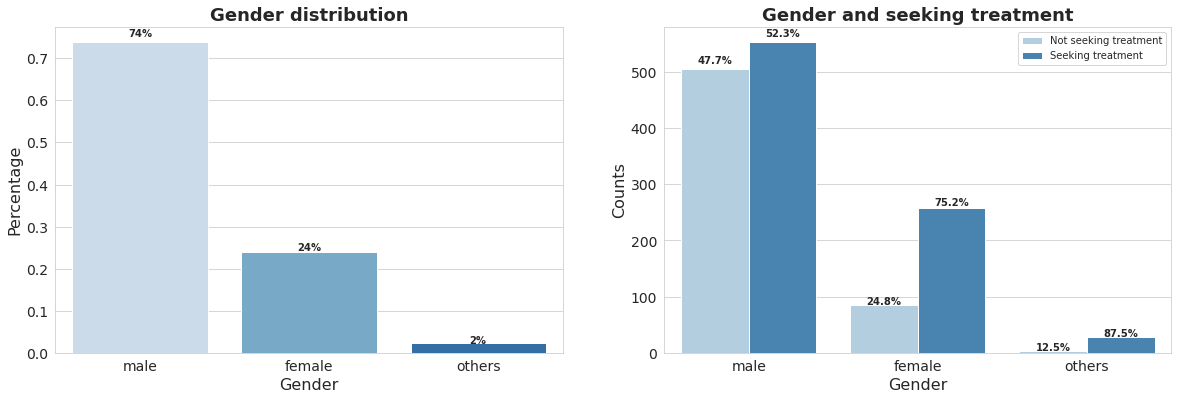

In [40]:
#Gender Vs Treatment
gender_percentage = df_to_use_no_outliers['gender'].value_counts(normalize = True).rename_axis('gender').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'gender', y = 'Percentage', data = gender_percentage, palette = 'Blues')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Gender distribution', fontsize=18, fontweight='bold')
plt.xlabel('Gender', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['gender'], hue = df_to_use_no_outliers['mhd_treatment'], palette = 'Blues')
plt.title('Gender and seeking treatment',  fontsize=18, fontweight='bold')
plt.xlabel('Gender', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Not seeking treatment', 'Seeking treatment'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


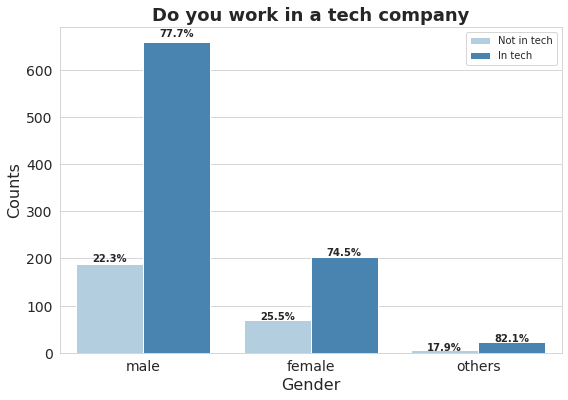

In [41]:
# Gender and tech companies
plt.figure(figsize = (9,6))
ax1 = sns.countplot(df_to_use_no_outliers['gender'], hue = df_to_use_no_outliers['tech_company'], palette = 'Blues')
plt.title('Do you work in a tech company',  fontsize=18, fontweight='bold')
plt.xlabel('Gender', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Not in tech', 'In tech'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


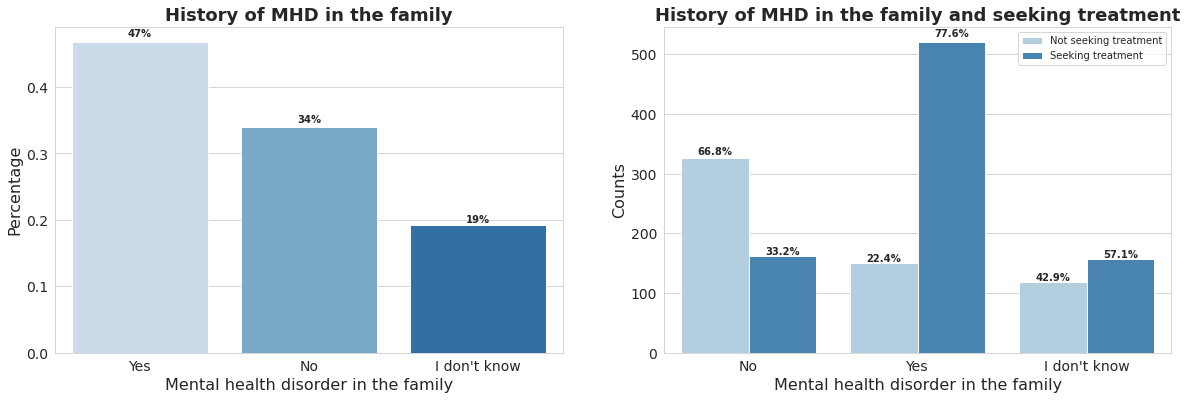

In [42]:
#mhd family history Vs Treatment
family_history_percentage = df_to_use_no_outliers['mhd_family_history'].value_counts(normalize = True).rename_axis('mhd_family_history').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'mhd_family_history', y = 'Percentage', data = family_history_percentage, palette = 'Blues')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('History of MHD in the family', fontsize=18, fontweight='bold')
plt.xlabel('Mental health disorder in the family', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['mhd_family_history'], hue = df_to_use_no_outliers['mhd_treatment'], palette = 'Blues')
plt.title('History of MHD in the family and seeking treatment',  fontsize=18, fontweight='bold')
plt.xlabel('Mental health disorder in the family', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Not seeking treatment', 'Seeking treatment'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

### 2.2 Do you currently have a mental health disorder?

In [43]:
df_to_use_no_outliers['mhd_currently'].isna().sum()

0

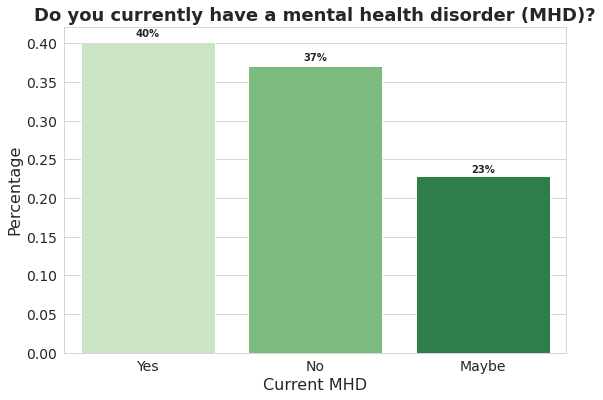

In [44]:
mhd_currently_percentage = df_to_use_no_outliers['mhd_currently'].value_counts(normalize = True).rename_axis('mhd_currently').reset_index(name = 'Percentage')

plt.figure(figsize = (9,6))
sns.set_style("whitegrid")
ax = sns.barplot(data = mhd_currently_percentage, x = 'mhd_currently', y = 'Percentage', palette='Greens')
plt.title('Do you currently have a mental health disorder (MHD)?', fontsize=18, fontweight='bold')
plt.xlabel('Current MHD', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


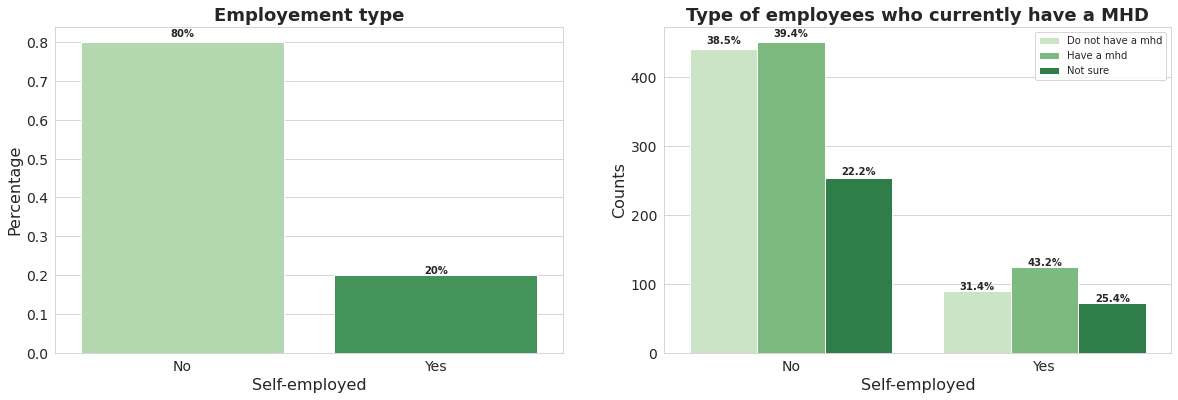

In [45]:
# Type of employers vs current mhd

employment_percentage = df_to_use_no_outliers['self-employed'].value_counts(normalize = True).rename_axis('self-employed').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'self-employed', y = 'Percentage', data = employment_percentage, palette = 'Greens')
ax.set_xticklabels(labels=['No', 'Yes'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement type', fontsize=18, fontweight='bold')
plt.xlabel('Self-employed', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['self-employed'], hue = df_to_use_no_outliers['mhd_currently'], palette = 'Greens')
ax1.set_xticklabels(labels=['No', 'Yes'])
plt.title('Type of employees who currently have a MHD',  fontsize=18, fontweight='bold')
plt.xlabel('Self-employed', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


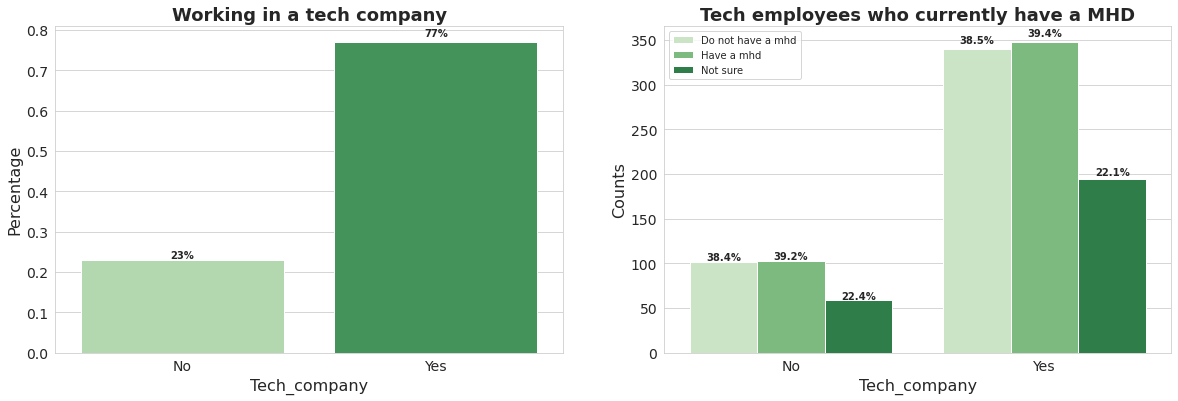

In [46]:
#Is your employer primarily a tech company/organization? Vs current mhd
tech_percentage = df_to_use_no_outliers['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = tech_percentage, palette = 'Greens')
ax.set_xticklabels(labels=['No', 'Yes'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working in a tech company', fontsize=18, fontweight='bold')
plt.xlabel('Tech_company', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['tech_company'], hue = df_to_use_no_outliers['mhd_currently'], palette = 'Greens')
ax1.set_xticklabels(labels=['No', 'Yes'])
plt.title('Tech employees who currently have a MHD',  fontsize=18, fontweight='bold')
plt.xlabel('Tech_company', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


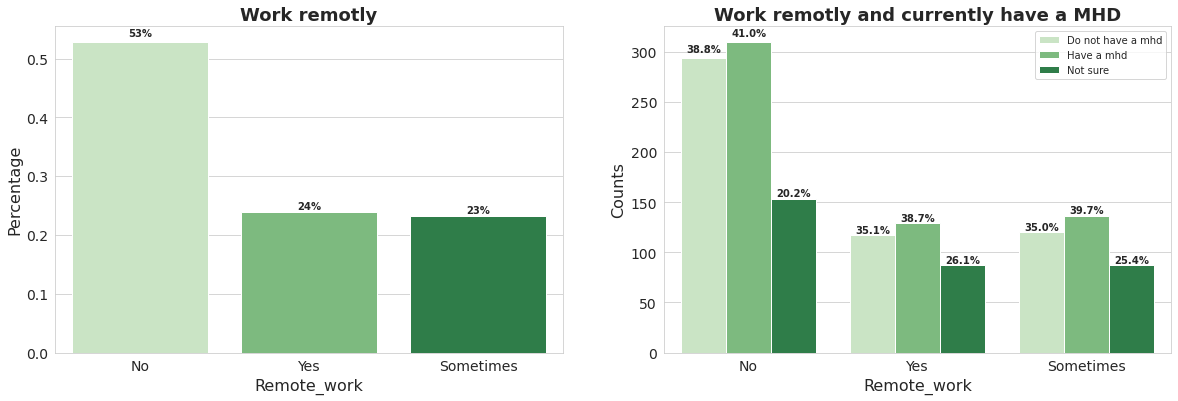

In [47]:
#Do you work remotely? Vs Current MHD
remote_percentage = df_to_use_no_outliers['remote_work'].value_counts(normalize = True).rename_axis('Remote_work').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'Remote_work', y = 'Percentage', data = remote_percentage, palette = 'Greens')
ax.set_xticklabels(labels=['No', 'Yes', 'Sometimes'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work remotly', fontsize=18, fontweight='bold')
plt.xlabel('Remote_work', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['remote_work'], hue = df_to_use_no_outliers['mhd_currently'], palette = 'Greens')
ax1.set_xticklabels(labels=['No', 'Yes', 'Sometimes'])
plt.title('Work remotly and currently have a MHD',  fontsize=18, fontweight='bold')
plt.xlabel('Remote_work', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


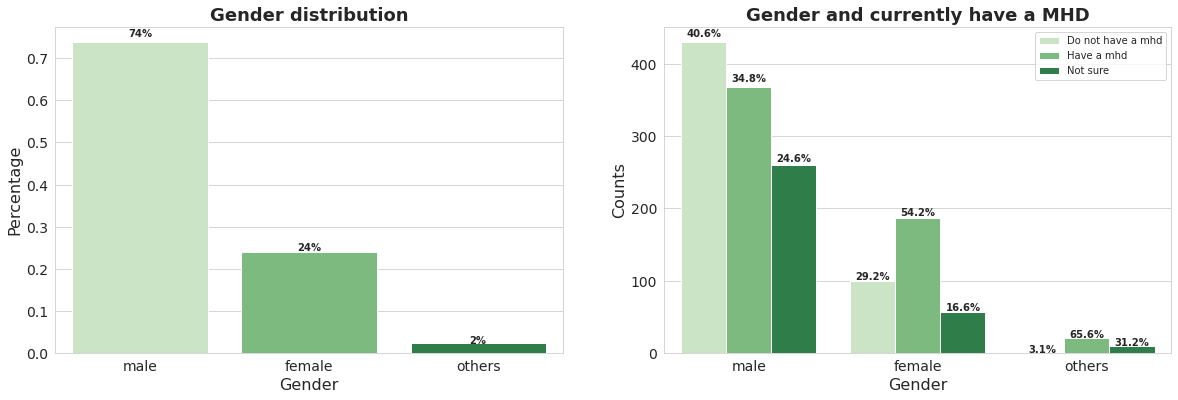

In [48]:
#Gender Vs current mhd
gender_percentage = df_to_use_no_outliers['gender'].value_counts(normalize = True).rename_axis('gender').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'gender', y = 'Percentage', data = gender_percentage, palette = 'Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Gender distribution', fontsize=18, fontweight='bold')
plt.xlabel('Gender', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['gender'], hue = df_to_use_no_outliers['mhd_currently'], palette = 'Greens')
plt.title('Gender and currently have a MHD',  fontsize=18, fontweight='bold')
plt.xlabel('Gender', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


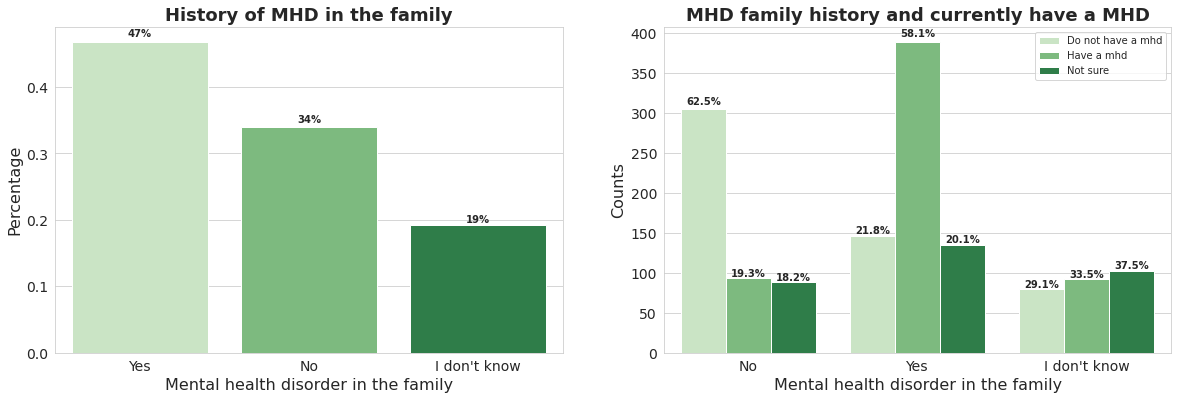

In [49]:
#mhd family history Vs currently having mhd
family_history_percentage = df_to_use_no_outliers['mhd_family_history'].value_counts(normalize = True).rename_axis('mhd_family_history').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'mhd_family_history', y = 'Percentage', data = family_history_percentage, palette = 'Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('History of MHD in the family', fontsize=18, fontweight='bold')
plt.xlabel('Mental health disorder in the family', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['mhd_family_history'], hue = df_to_use_no_outliers['mhd_currently'], palette = 'Greens')
plt.title('MHD family history and currently have a MHD',  fontsize=18, fontweight='bold')
plt.xlabel('Mental health disorder in the family', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


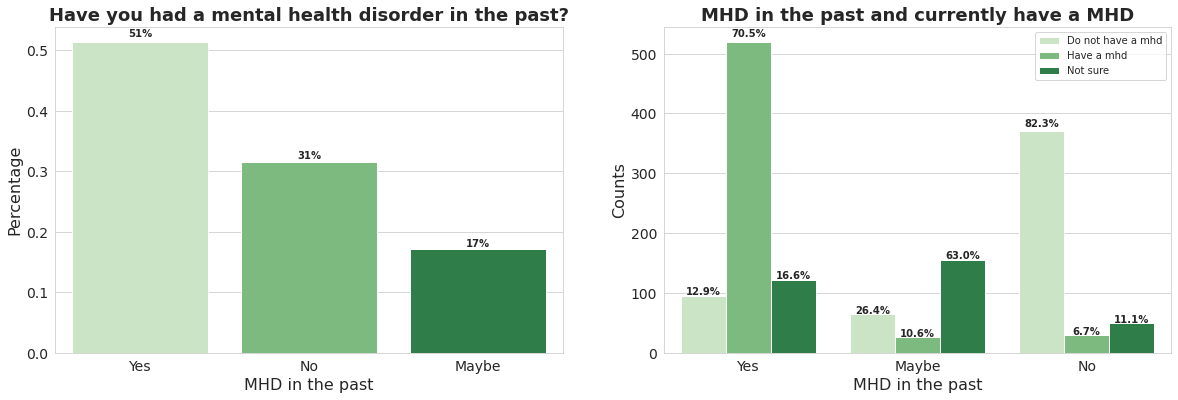

In [50]:
#your mhd history Vs currently having mhd
your_history_percentage = df_to_use_no_outliers['mhd_in_the_past'].value_counts(normalize = True).rename_axis('mhd_in_the_past').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'mhd_in_the_past', y = 'Percentage', data = your_history_percentage, palette = 'Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Have you had a mental health disorder in the past?', fontsize=18, fontweight='bold')
plt.xlabel('MHD in the past', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['mhd_in_the_past'], hue = df_to_use_no_outliers['mhd_currently'], palette = 'Greens')
plt.title('MHD in the past and currently have a MHD',  fontsize=18, fontweight='bold')
plt.xlabel('MHD in the past', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


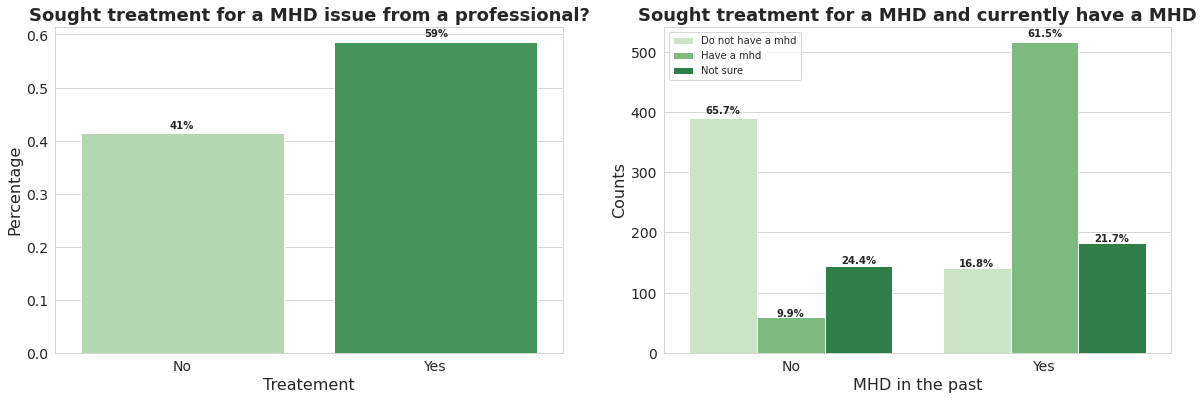

In [51]:
#Sought treatment for mhd issue Vs currently having mhd
treatment_percentage = df_to_use_no_outliers['mhd_treatment'].value_counts(normalize = True).rename_axis('mhd_treatment').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'mhd_treatment', y = 'Percentage', data = treatment_percentage, palette = 'Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Sought treatment for a MHD issue from a professional?', fontsize=18, fontweight='bold')
plt.xlabel('Treatement', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels(labels=['No', 'Yes'])


plt.subplot(1,2,2)
ax1 = sns.countplot(df_to_use_no_outliers['mhd_treatment'], hue = df_to_use_no_outliers['mhd_currently'], palette = 'Greens')
plt.title('Sought treatment for a MHD and currently have a MHD',  fontsize=18, fontweight='bold')
plt.xlabel('MHD in the past', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
ax1.set_xticklabels(labels=['No', 'Yes'])

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

In [52]:
#bin and plot age 
df_age = df_to_use_no_outliers.copy()
df_age['age_by_decade'] = pd.cut(x=df_age['age'], bins=[18, 27, 37, 47, 57, 65],labels=['18-27', '28-37', '38-47', '48-57', '58-65'])
df_age.head(3)

,self-employed,no_employees,tech_company,mh_benefits,mh_wellness_campaign,mhd_offered_resources,protected_anonymity,mhd_medical_leave,mhd_employer_discussion_neg_csq,ph_employer_discussion_neg_csq,...,mhd_treatment,mh_work_interfere_treatment,mh_work_interfere,age,gender,live_in_country,work_in_country,work_position,remote_work,age_by_decade
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,No,...,0,Not applicable to me,Not applicable to me,39,male,UK,UK,Back-end Developer,Sometimes,38-47
1,0,6-25,1.0,No,Yes,Yes,Yes,Somewhat easy,No,No,...,1,Rarely,Sometimes,29,male,USA,USA,Back-end Developer|Front-end Developer,Never,28-37
2,0,6-25,1.0,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,1,Not applicable to me,Not applicable to me,38,male,UK,UK,Back-end Developer,Always,38-47


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


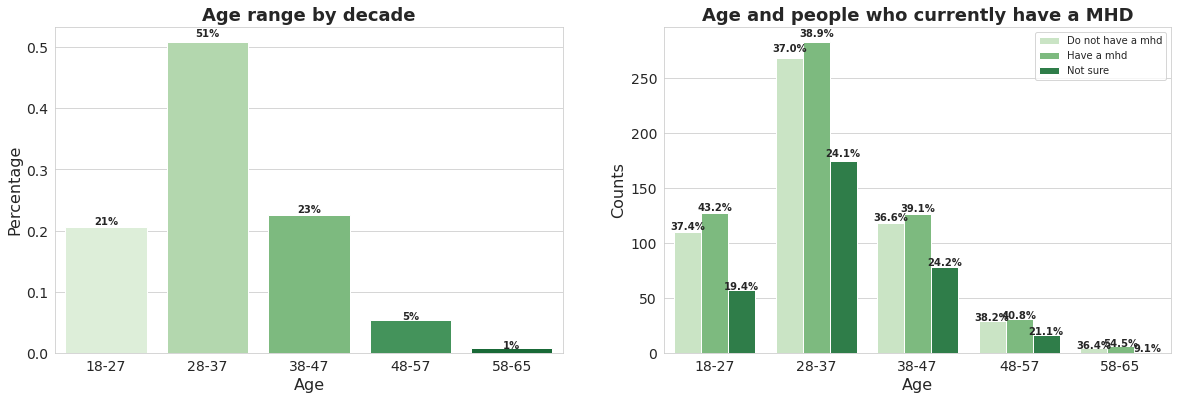

In [53]:
#age range by decades Vs currently having mhd
treatment_percentage = df_age['age_by_decade'].value_counts(normalize = True).rename_axis('age_by_decade').reset_index(name = 'Percentage')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = 'age_by_decade', y = 'Percentage', data = treatment_percentage, palette = 'Greens')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Age range by decade', fontsize=18, fontweight='bold')
plt.xlabel('Age', size=16)
plt.ylabel('Percentage', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels(labels=['18-27', '28-37', '38-47', '48-57', '58-65'])


plt.subplot(1,2,2)
ax1 = sns.countplot(df_age['age_by_decade'], hue = df_age['mhd_currently'], palette = 'Greens')
plt.title('Age and people who currently have a MHD',  fontsize=18, fontweight='bold')
plt.xlabel('Age', size=16)
plt.ylabel('Counts', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
ax1.set_xticklabels(labels=['18-27', '28-37', '38-47', '48-57', '58-65'])

handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

percentage_above_bar_relative_to_xgroup(ax1)

plt.show()

# 3. Create a dummy model to predict whether one currently has a MHD

#### Based on the performed EDA above there are few features which seems to correlate with the "Do you currently have a MHD?" target question. These features are the following:
  *  _Gender_
  *  _History of MHD in the family_
  *  _Have you had a MHD in the past_
  *  _Sought treatment for a MHD issue_


#### We choose the Gender to create a dummy model

In [54]:
# 1. create a function t0 check if an employee has currently MDH  or not based on gender
#dummy model gender (feature)
def dm(gender): 
  if gender == 'female':
    return 2
  elif gender == 'others':
    return 1
  elif gender == 'male':
    return 0 


#dummy model mhd_currently (to predict)
def dummy_model(mhd): 
  if mhd == 'Yes':
    return 2
  elif mhd == 'Maybe':
    return 1
  elif mhd == 'No':
    return 0

In [55]:
# 2. add prediction to our data
df_temp = df_to_use_no_outliers.copy()
df_temp['preds'] = [dm(gender) for gender in df_temp['gender']]
df_temp['current_mhd'] = [dummy_model(mhd) for mhd in df_temp['mhd_currently']]
df_temp.head(2)

,self-employed,no_employees,tech_company,mh_benefits,mh_wellness_campaign,mhd_offered_resources,protected_anonymity,mhd_medical_leave,mhd_employer_discussion_neg_csq,ph_employer_discussion_neg_csq,...,mh_work_interfere_treatment,mh_work_interfere,age,gender,live_in_country,work_in_country,work_position,remote_work,preds,current_mhd
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,male,UK,UK,Back-end Developer,Sometimes,0,0
1,0,6-25,1.0,No,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,USA,USA,Back-end Developer|Front-end Developer,Never,0,2


In [56]:
# 3. take a look to the columns we want to compare
error_check = (
df_temp
  .filter(['current_mhd','preds'])
  .assign(check = lambda x: x['current_mhd'] == x['preds'])
)
error_check.sample(10)

,current_mhd,preds,check
809,2,0,False
1361,1,0,False
876,1,0,False
600,0,0,True
1013,2,2,True
15,2,0,False
28,1,2,False
1251,2,2,True
968,2,0,False
271,0,0,True


In [57]:
# 4. check total number of correct answers
error_check['check'].sum()

626

In [58]:
# 5. calculate the accuracy of our model is: 
acc_dummy = error_check['check'].sum()/error_check.shape[0]
acc_dummy

0.4368457780879274

# 4. Preprocessing - get data ready for the ML 

### 4.1 Dealing with the remaining missing values

In [59]:
df_to_use_no_outliers.isna().sum()

self-employed                            0
no_employees                           287
tech_company                           287
mh_benefits                            287
mh_wellness_campaign                   287
mhd_offered_resources                  287
protected_anonymity                    287
mhd_medical_leave                      287
mhd_employer_discussion_neg_csq        287
ph_employer_discussion_neg_csq         287
mhd_coworkers_discussion               287
mhd_supervisor_discussion              287
mhd_seriousness_employer               287
mhd_neg_conseq_coworkers               287
prev_employers                           0
prev_employers_mhd_benefits            169
prev_mhd_care_communication            169
prev_employer_mhd_wellness_campaign    169
prev_mhd_resources                     169
prev_protedted_anonymity               169
prev_mhd_employer_discussion_impact    169
prev_ph_employer_discussion_impact     169
prev_mhd_coworkers_discussion          169
prev_mhd_su

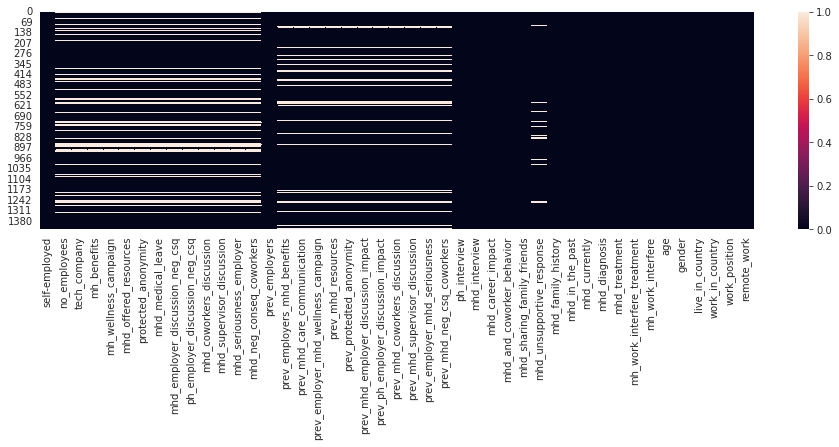

In [60]:
# Missing values visualisation
plt.figure(figsize = (16,4))
sns.heatmap(data = df_to_use_no_outliers.isna());

In [61]:
# Impute the missing values with the most frequent value (mode) on every row

df_for_imp = df_to_use_no_outliers.copy()
imp = SimpleImputer(strategy='most_frequent')


df_imp = imp.fit_transform(df_for_imp)
df_imp = pd.DataFrame(data=df_imp, columns=df_for_imp.columns)

In [62]:
df_imp.head(10)

,self-employed,no_employees,tech_company,mh_benefits,mh_wellness_campaign,mhd_offered_resources,protected_anonymity,mhd_medical_leave,mhd_employer_discussion_neg_csq,ph_employer_discussion_neg_csq,...,mhd_diagnosis,mhd_treatment,mh_work_interfere_treatment,mh_work_interfere,age,gender,live_in_country,work_in_country,work_position,remote_work
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,No,...,Yes,0,Not applicable to me,Not applicable to me,39,male,UK,UK,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Somewhat easy,No,No,...,Yes,1,Rarely,Sometimes,29,male,USA,USA,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,No,1,Not applicable to me,Not applicable to me,38,male,UK,UK,Back-end Developer,Always
3,1,26-100,1.0,Yes,No,No,I don't know,Somewhat easy,Maybe,No,...,Yes,1,Sometimes,Sometimes,43,male,UK,UK,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Yes,1,Sometimes,Sometimes,43,female,USA,USA,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,Yes,No,Yes,Yes,Somewhat easy,Yes,Yes,...,No,1,Not applicable to me,Often,42,male,UK,UK,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,I don't know,No,No,I don't know,Somewhat easy,No,No,...,No,0,Not applicable to me,Not applicable to me,30,male,USA,USA,Back-end Developer,Sometimes
7,0,More than 1000,1.0,Yes,No,Yes,Yes,Very easy,No,No,...,Yes,1,Sometimes,Often,37,female,USA,USA,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,I don't know,No,No,I don't know,Very difficult,Yes,Yes,...,Yes,1,Rarely,Often,44,female,USA,USA,Support|Back-end Developer|One-person shop,Sometimes
9,1,26-100,1.0,Yes,No,No,I don't know,Somewhat easy,Maybe,No,...,Yes,1,Rarely,Often,30,male,USA,USA,One-person shop|Front-end Developer|Back-end D...,Always


In [63]:
df_imp.isna().sum()

self-employed                          0
no_employees                           0
tech_company                           0
mh_benefits                            0
mh_wellness_campaign                   0
mhd_offered_resources                  0
protected_anonymity                    0
mhd_medical_leave                      0
mhd_employer_discussion_neg_csq        0
ph_employer_discussion_neg_csq         0
mhd_coworkers_discussion               0
mhd_supervisor_discussion              0
mhd_seriousness_employer               0
mhd_neg_conseq_coworkers               0
prev_employers                         0
prev_employers_mhd_benefits            0
prev_mhd_care_communication            0
prev_employer_mhd_wellness_campaign    0
prev_mhd_resources                     0
prev_protedted_anonymity               0
prev_mhd_employer_discussion_impact    0
prev_ph_employer_discussion_impact     0
prev_mhd_coworkers_discussion          0
prev_mhd_supervisor_discussion         0
prev_employer_mh

In [64]:
df_imp.shape

(1433, 45)

### 4.2 Preparation of the categorical features for encoding

In [65]:
df_to_encode = df_imp.copy()

In [66]:
# How many unique values have every feature
df_to_encode.describe(include='all').loc['unique', :]

self-employed                            2
no_employees                             6
tech_company                           2.0
mh_benefits                              4
mh_wellness_campaign                     3
mhd_offered_resources                    3
protected_anonymity                      3
mhd_medical_leave                        6
mhd_employer_discussion_neg_csq          3
ph_employer_discussion_neg_csq           3
mhd_coworkers_discussion                 3
mhd_supervisor_discussion                3
mhd_seriousness_employer                 3
mhd_neg_conseq_coworkers                 2
prev_employers                           2
prev_employers_mhd_benefits              4
prev_mhd_care_communication              4
prev_employer_mhd_wellness_campaign      4
prev_mhd_resources                       3
prev_protedted_anonymity                 4
prev_mhd_employer_discussion_impact      4
prev_ph_employer_discussion_impact       3
prev_mhd_coworkers_discussion            3
prev_mhd_su

In [67]:
df_to_encode['work_position']

0                                      Back-end Developer
1                  Back-end Developer|Front-end Developer
2                                      Back-end Developer
3                                    Supervisor/Team Lead
4       Executive Leadership|Supervisor/Team Lead|Dev ...
                              ...                        
1428                                                Other
1429                                              Support
1430                                   Back-end Developer
1431                                      DevOps/SysAdmin
1432                                                Other
Name: work_position, Length: 1433, dtype: object

#### The columns: "live_in_country", "work_in_country" and especially "work_position" have many unique values. This will couse massive increase in the number of features after applying the OneHotEncoder. So I will exclude those columns. Also, will exclude the columns: "ph_employer_discussion_neg_csq", "ph_interview" and "prev_ph_employer_discussion_impact", because they are about physical issues

In [68]:
col_to_exclude = ['live_in_country',
                  'work_in_country',
                  'work_position',
                  'ph_employer_discussion_neg_csq',
                  'ph_interview',
                  'prev_ph_employer_discussion_impact']

df_to_encode.drop(col_to_exclude, axis=1, inplace=True)

In [69]:
df_to_encode.shape

(1433, 39)

In [70]:
# Get the unique values of every feature to check for ordinal data
for col in list(df_to_encode):
    print(col)
    print(df_to_encode[col].unique())

self-employed
[0 1]
no_employees
['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']
tech_company
[1.0 0.0]
mh_benefits
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]
mh_wellness_campaign
['No' 'Yes' "I don't know"]
mhd_offered_resources
['No' 'Yes' "I don't know"]
protected_anonymity
["I don't know" 'Yes' 'No']
mhd_medical_leave
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' 'Very difficult'
 'Somewhat difficult' "I don't know"]
mhd_employer_discussion_neg_csq
['No' 'Maybe' 'Yes']
mhd_coworkers_discussion
['Maybe' 'Yes' 'No']
mhd_supervisor_discussion
['Yes' 'Maybe' 'No']
mhd_seriousness_employer
["I don't know" 'Yes' 'No']
mhd_neg_conseq_coworkers
['No' 'Yes']
prev_employers
[1 0]
prev_employers_mhd_benefits
['No, none did' 'Yes, they all did' 'Some did' "I don't know"]
prev_mhd_care_communication
['N/A (not currently aware)' 'I was aware of some'
 'Yes, I was aware of all of them' 'No, I only became aware later']
prev_employer_mhd_wellness_campaig

In [71]:
# Separate the features by their type

nominal_featers = ['self-employed', #with O and 1
                   'tech_company', #with 0 and 1
                   'mh_benefits',
                   'mh_wellness_campaign',
                   'mhd_offered_resources',
                   'protected_anonymity',
                   'mhd_employer_discussion_neg_csq',
                   'mhd_coworkers_discussion',
                   'mhd_supervisor_discussion',
                   'mhd_seriousness_employer',
                   'mhd_neg_conseq_coworkers',
                   'prev_employers', #with 0 and 1
                   'mhd_interview',
                   'mhd_family_history',
                   'mhd_in_the_past',
                   'mhd_diagnosis',
                   'mhd_treatment', #with 0 and 1
                   'gender'                  
]

ordinal_features = ['no_employees',
                    'mhd_medical_leave',
                    'prev_employers_mhd_benefits',
                    'prev_mhd_care_communication',
                    'prev_employer_mhd_wellness_campaign',
                    'prev_mhd_resources',
                    'prev_protedted_anonymity',
                    'prev_mhd_employer_discussion_impact',
                    'prev_mhd_coworkers_discussion',
                    'prev_mhd_supervisor_discussion',
                    'prev_employer_mhd_seriousness',
                    'prev_mhd_neg_csq_coworkers',
                    'mhd_career_impact',
                    'mhd_and_coworker_behavior',
                    'mhd_sharing_family_friends',
                    'mhd_unsupportive_response',
                    'mh_work_interfere_treatment',
                    'mh_work_interfere',
                    'mhd_currently',
                    'remote_work'                   
]

Numerical_features = ['age']

To reduce the ordinal encoding check out which ordinal features could have a significand predictive power
   and use those ones

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


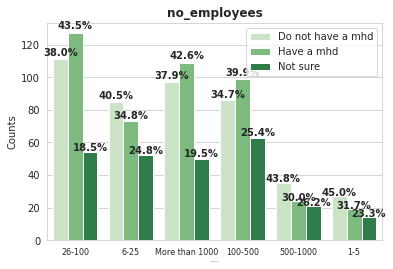

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


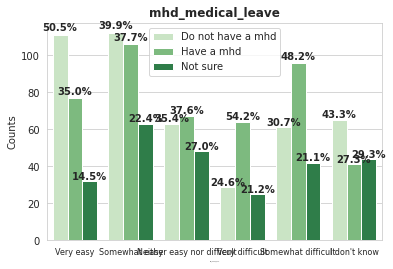

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


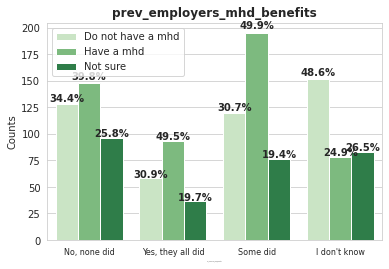

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


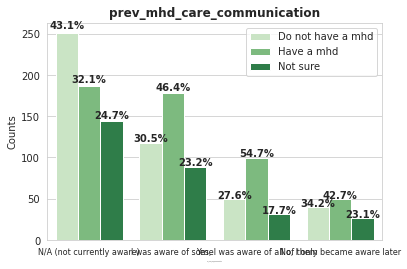

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


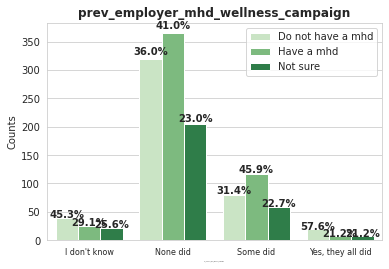

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


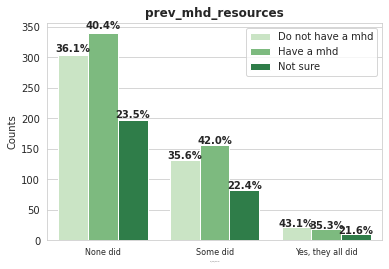

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


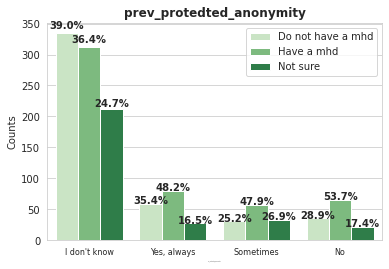

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


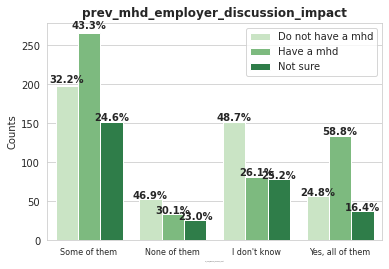

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


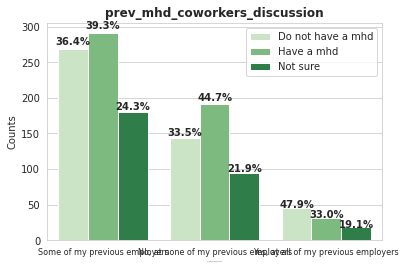

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


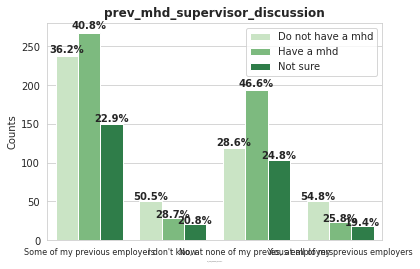

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


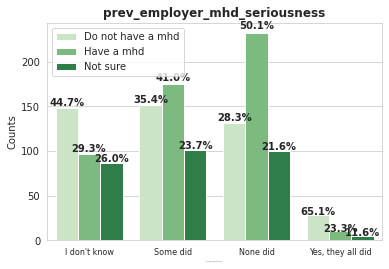

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


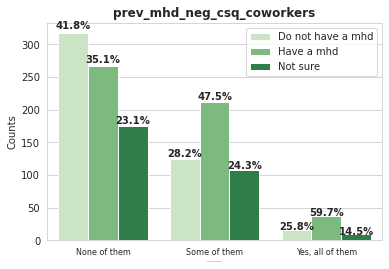

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


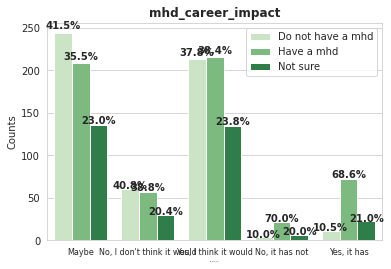

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


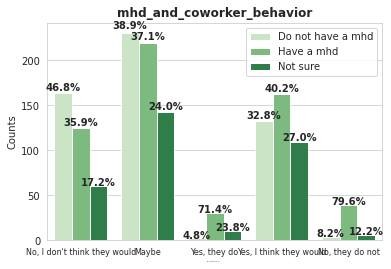

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


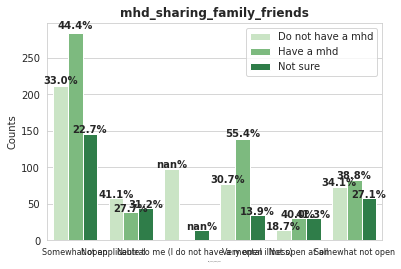

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


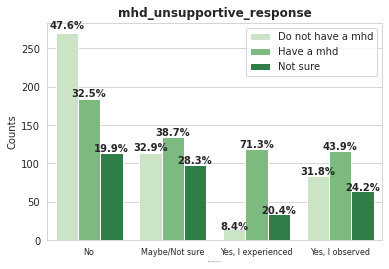

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


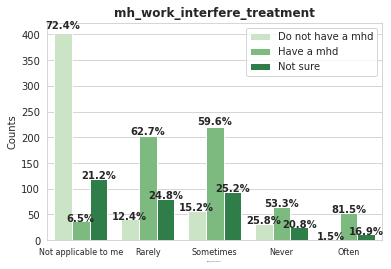

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


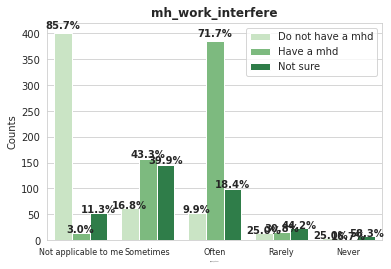

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


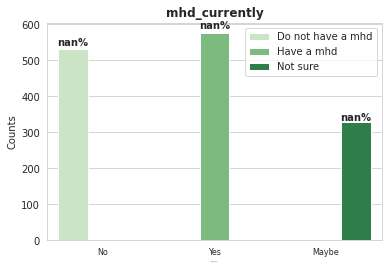

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


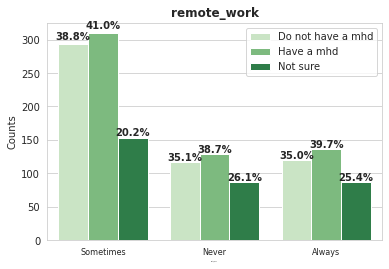

In [72]:
for i in ordinal_features:
  ax1 = sns.countplot(df_to_use_no_outliers[i], hue = df_to_use_no_outliers['mhd_currently'], palette = 'Greens')
  plt.title(i,  fontsize=12, fontweight='bold')
  plt.xlabel(i, size=1)
  plt.ylabel('Counts', size=10)
  plt.xticks(fontsize=8)
  plt.yticks(fontsize=10)
  plt.legend(fontsize=12)
  #ax1.set_xticklabels(labels=['No', 'Yes'])

  handles, labels  =  ax1.get_legend_handles_labels()
  ax1.legend(handles, ['Do not have a mhd', 'Have a mhd', 'Not sure'])

  percentage_above_bar_relative_to_xgroup(ax1)

  plt.show()

Will use the following ordinal features:
  * _prev_employer_mhd_seriousness_
  * _mhd_unsupportive_response_
  * _mh_work_interfere_

Obviously, the "mhd_currently" is the target feature, so will just map it

### 4.3 Create a DataFrame for the ML

In [73]:
# Exclude the ordinal features which does not seem to have a predictive power

ordinal_features_to_exclude = ['no_employees',
                    'mhd_medical_leave',
                    'prev_employers_mhd_benefits',
                    'prev_mhd_care_communication',
                    'prev_employer_mhd_wellness_campaign',
                    'prev_mhd_resources',
                    'prev_protedted_anonymity',
                    'prev_mhd_employer_discussion_impact',
                    'prev_mhd_coworkers_discussion',
                    'prev_mhd_supervisor_discussion',
                    'prev_mhd_neg_csq_coworkers',
                    'mhd_career_impact',
                    'mhd_and_coworker_behavior',
                    'mhd_sharing_family_friends',
                    'mh_work_interfere_treatment',
                    'remote_work'                   
]

df_for_ML_1 = df_to_encode.copy()

df_for_ML_1.drop(ordinal_features_to_exclude, axis=1, inplace=True)
df_for_ML_1.shape

(1433, 23)

Map the "mhd_currently" column (the target) as follows: No = 0; Maybe = 1, Yes = 2

In [74]:
mhd_currently_mapped = {'No':0, 'Maybe':1, 'Yes':2}

df_for_ML_2 = df_for_ML_1.copy()
df_for_ML_2['mhd_currently'] = df_for_ML_2['mhd_currently'].map(mhd_currently_mapped)

In [75]:
# Map the nominal features wich have 0 and 1 to "No" and "Yes"

df_for_ML_3 = df_for_ML_2.copy()

self_employed_mapped = {0:'No', 1:'Yes'}
tech_company_mapped = {0:'No', 1:'Yes'}
prev_employers_mapped = {0:'No', 1:'Yes'}
mhd_treatment_mapped = {0:'No', 1:'Yes'}

df_for_ML_3['self-employed'] = df_for_ML_3['self-employed'].map(self_employed_mapped)
df_for_ML_3['tech_company'] = df_for_ML_3['tech_company'].map(tech_company_mapped)
df_for_ML_3['prev_employers'] = df_for_ML_3['prev_employers'].map(prev_employers_mapped)
df_for_ML_3['mhd_treatment'] = df_for_ML_3['mhd_treatment'].map(mhd_treatment_mapped)

In [76]:
# Transform the age column to integer
df_for_ML_3['age'] = df_for_ML_3['age'].astype(int)

In [77]:
df_for_ML_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   self-employed                    1433 non-null   object
 1   tech_company                     1433 non-null   object
 2   mh_benefits                      1433 non-null   object
 3   mh_wellness_campaign             1433 non-null   object
 4   mhd_offered_resources            1433 non-null   object
 5   protected_anonymity              1433 non-null   object
 6   mhd_employer_discussion_neg_csq  1433 non-null   object
 7   mhd_coworkers_discussion         1433 non-null   object
 8   mhd_supervisor_discussion        1433 non-null   object
 9   mhd_seriousness_employer         1433 non-null   object
 10  mhd_neg_conseq_coworkers         1433 non-null   object
 11  prev_employers                   1433 non-null   object
 12  prev_employer_mhd_seriousness    1

# 5. Iteration 1: DecisionTreeClassifier with 22 features

### 5.1 Create Train and Test data sets

In [78]:
X = df_for_ML_3.drop(columns=['mhd_currently'])
y = df_for_ML_3.filter(['mhd_currently'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

In [79]:
X_train.head()

,self-employed,tech_company,mh_benefits,mh_wellness_campaign,mhd_offered_resources,protected_anonymity,mhd_employer_discussion_neg_csq,mhd_coworkers_discussion,mhd_supervisor_discussion,mhd_seriousness_employer,...,prev_employer_mhd_seriousness,mhd_interview,mhd_unsupportive_response,mhd_family_history,mhd_in_the_past,mhd_diagnosis,mhd_treatment,mh_work_interfere,age,gender
297,No,Yes,Yes,No,No,Yes,No,Maybe,Maybe,Yes,...,Some did,Maybe,"Yes, I experienced",Yes,Yes,Yes,Yes,Sometimes,47,female
589,No,Yes,I don't know,No,I don't know,No,Maybe,Maybe,Maybe,No,...,None did,Maybe,"Yes, I experienced",I don't know,Yes,Yes,Yes,Often,33,male
397,No,Yes,I don't know,Yes,I don't know,Yes,Maybe,Maybe,No,Yes,...,None did,No,No,No,No,No,Yes,Not applicable to me,22,male
91,No,Yes,Yes,I don't know,Yes,I don't know,Maybe,Maybe,Maybe,I don't know,...,I don't know,No,No,Yes,Yes,Yes,Yes,Often,35,male
39,No,Yes,Yes,I don't know,I don't know,I don't know,Maybe,Yes,Yes,I don't know,...,I don't know,Yes,"Yes, I observed",I don't know,No,No,No,Not applicable to me,44,male


In [80]:
X_train.columns

Index(['self-employed', 'tech_company', 'mh_benefits', 'mh_wellness_campaign',
       'mhd_offered_resources', 'protected_anonymity',
       'mhd_employer_discussion_neg_csq', 'mhd_coworkers_discussion',
       'mhd_supervisor_discussion', 'mhd_seriousness_employer',
       'mhd_neg_conseq_coworkers', 'prev_employers',
       'prev_employer_mhd_seriousness', 'mhd_interview',
       'mhd_unsupportive_response', 'mhd_family_history', 'mhd_in_the_past',
       'mhd_diagnosis', 'mhd_treatment', 'mh_work_interfere', 'age', 'gender'],
      dtype='object')

### 5.2 Pipeline

In [81]:
# Create a list with ordered catogories from each ordinal feature
prev_employer_mhd_seriousness = ['None did', "I don't know", 'Some did', 'Yes, they all did']
mhd_unsupportive_response = ['No', 'Maybe/Not sure', 'Yes, I observed', 'Yes, I experienced']
mh_work_interfere = ['Never', 'Not applicable to me', 'Rarely', 'Sometimes', 'Often']

# Create a list with all features (which wil be used in the ML) for a certain (ordinal, nominal and numerical) feature type
ordinal_cats = ['prev_employer_mhd_seriousness',
                'mhd_unsupportive_response',
                'mh_work_interfere']

nominal_cats = ['self-employed',
                'tech_company',
                'mh_benefits',
                'mh_wellness_campaign',
                'mhd_offered_resources',
                'protected_anonymity',
                'mhd_employer_discussion_neg_csq',
                'mhd_coworkers_discussion',
                'mhd_supervisor_discussion',
                'mhd_seriousness_employer',
                'mhd_neg_conseq_coworkers',
                'prev_employers',
                'mhd_interview',
                'mhd_family_history',
                'mhd_in_the_past',
                'mhd_diagnosis',
                'mhd_treatment',
                'gender']                   

numerical_cats = ['age']

In [82]:
# numerical and categorical pipelines
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median'))                              
    #('scale', MinMaxScaler())  # scale the numerical columns
])

nominal_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(drop='first', sparse=False))  # Dummify the nominal categ features
])

ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())  # Dummify the ordinal categ features
])

# column selection
num_features = list(X[numerical_cats])
nom_cat_features = list(X[nominal_cats])
ord_cat_features = list(X[ordinal_cats])


full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_features), 
    ('nom_category', nominal_pipeline, nom_cat_features),
    ('ord_category', ordinal_pipeline, ord_cat_features)
])

In [83]:
# adding the model in our pipeline
dec_tree_pipe = Pipeline(steps=[
    ('processor', full_processor), 
    ('model', DecisionTreeClassifier())
])

### 5.3 Train the model

In [84]:
# fit our model to the train
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('nom_category',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['self-employed',
                                                   'tech_company',
                                                   'mh_benefits',
                                                   'mh_wellness_campaign',
                                                   

In [85]:
# score on the train
accuracy_score(dec_tree_pipe.predict(X_train), y_train)

1.0

The model is overfiting. One must tune the model

### 5.4 Test and evaluate the model

In [86]:
# Test the model and check the score
y_pred = dec_tree_pipe.predict(X_test)

dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_accuracy

0.6740947075208914

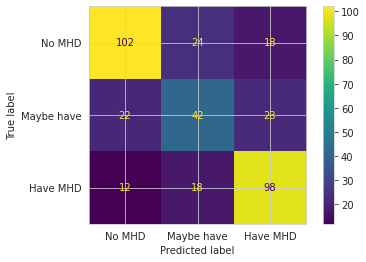

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No MHD','Maybe have', 'Have MHD'])

# 6. Iteration 2: DecisionTree with Automaticaly tunned parameters 

### 6.1 Get the best parameters and train

In [88]:
# automating the search of the different parameters for the model

param_grid = {
    'model__max_depth': range(3, 8),
    'model__min_samples_leaf': range(5, 10),
    'model__min_samples_split': range(6, 10),
    'model__criterion':['gini','entropy']
    }

# fit the model to the train
search = GridSearchCV(
    dec_tree_pipe, 
    param_grid, 
    cv=4,
    scoring='accuracy',
    verbose=1, 
    refit=True,
    n_jobs=-1
)

_ = search.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


In [89]:
tree_best_param = search.best_params_
tree_best_param

{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__min_samples_leaf': 8,
 'model__min_samples_split': 6}

In [90]:
accuracy_score(search.predict(X_train), y_train)

0.7811918063314711

### 6.3 Test and evaluate the model

In [91]:
y_pred_2 = search.predict(X_test)

dtc_accuracy_2 = accuracy_score(y_test, y_pred_2)
dtc_accuracy_2

0.7520891364902507

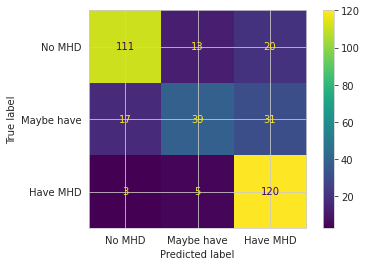

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, display_labels=['No MHD','Maybe have', 'Have MHD'])

# 7. Iteration 3: RandomForest with 22 features

In [93]:
# adding the model in our pipeline
rf_pipe = Pipeline(steps=[
    ('processor', full_processor), 
    ('model', RandomForestClassifier())
])

### 7.1 Train the model

In [94]:
# fit our model to the train
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('nom_category',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['self-employed',
                                                   'tech_company',
                                                   'mh_benefits',
                                                   'mh_wellness_campaign',
                                                   

In [95]:
# score on the train
accuracy_score(rf_pipe.predict(X_train), y_train)

1.0

### 7.2 Test and evaluate the model

In [96]:
# Test the model and check the score
y_pred_3 = rf_pipe.predict(X_test)

accuracy_3 = accuracy_score(y_test, y_pred_3)
accuracy_3

0.754874651810585

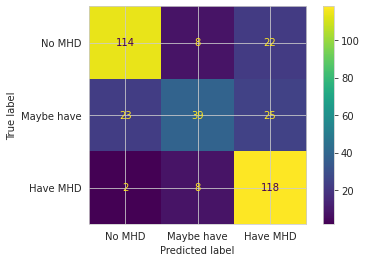

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_3, display_labels=['No MHD','Maybe have', 'Have MHD'])

# 8. Iteration 4: RandomForest with tunned parameters

In [ ]:
# defining the parameters of our model based on the gridsearch in Iteration 2
# (later on we can run again a gridsearch, but we want to speed up this process)
param_grid = {
    'criterion': 'gini',
    'max_depth': 5,
    'min_samples_leaf': 8,
    'min_samples_split': 6
    }


# adding the model in our pipeline
tunned_rf_pipe = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', RandomForestClassifier(**param_grid))
])

### 8.1 Train the model

In [ ]:
# fit our model to the train
tunned_rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('nom_category',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['self-employed',
                                                   'tech_company',
                                                   'mh_benefits',
                                                   'mh_wellness_campaign',
                                                  

In [ ]:
# score on the train
accuracy_score(tunned_rf_pipe.predict(X_train), y_train)

0.7579143389199255

### 8.2 Test and evaluate the model

In [ ]:
# Test the model and check the score
y_pred_4 = tunned_rf_pipe.predict(X_test)

accuracy_4 = accuracy_score(y_test, y_pred_4)
accuracy_4

0.754874651810585

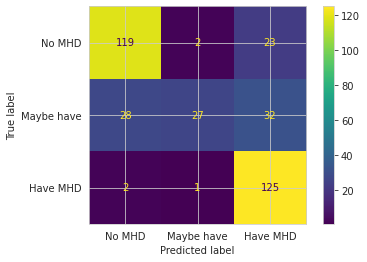

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_4, display_labels=['No MHD','Maybe have', 'Have MHD'])

# 9. Iteration 5: RandomForest using DecissionTree feature selection

In [ ]:
# adding the model in our pipeline
rf_feature_selec_pipe = Pipeline(steps=[
    ('preprocess', full_processor),
    # using a normal decision tree to decide which features are important
    ('feature_selection', SelectFromModel(DecisionTreeClassifier())), 
    ('model', RandomForestClassifier())
])

### 9.1 Train the model

In [ ]:
# fit our model to the train
rf_feature_selec_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('nom_category',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['self-employed',
                                                   'tech_company',
                                                   'mh_benefits',
                                                   'mh_wellness_campaign',
                                                  

In [ ]:
# score on the train
accuracy_score(rf_feature_selec_pipe.predict(X_train), y_train)

0.9543761638733705

### 9.2 Test and evaluate the model

In [ ]:
# Test the model and check the score
y_pred_5 = rf_feature_selec_pipe.predict(X_test)

accuracy_5 = accuracy_score(y_test, y_pred_5)
accuracy_5

0.713091922005571

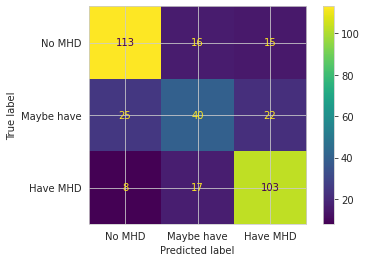

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_5, display_labels=['No MHD','Maybe have', 'Have MHD'])

# 10. Iteration 6: RandomForest + feature selection + tunning

### 10.1 Get the best parameters when feature selection is applyed and train

In [ ]:
# automating the search of the different parameters for the model

param_grid = {
    'model__max_depth': range(3, 8),
    'model__min_samples_leaf': range(5, 10),
    'model__min_samples_split': range(6, 10),
    'model__criterion':['gini','entropy']
    }

# fit the model to the train
search_2 = GridSearchCV(
    rf_feature_selec_pipe, 
    param_grid, 
    cv=4,
    scoring='accuracy',
    verbose=1, 
    refit=True,
    n_jobs=-1
)

_ = search_2.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
best_param = search_2.best_params_
best_param

{'model__criterion': 'entropy',
 'model__max_depth': 6,
 'model__min_samples_leaf': 9,
 'model__min_samples_split': 7}

In [ ]:
accuracy_score(search_2.predict(X_train), y_train)

0.7662942271880819

### 10.2 Test and evaluate the model

In [ ]:
y_pred_6 = search_2.predict(X_test)

accuracy_6 = accuracy_score(y_test, y_pred_6)
accuracy_6

0.754874651810585

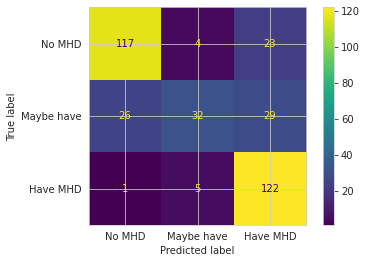

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_6, display_labels=['No MHD','Maybe have', 'Have MHD'])

In [ ]:
# Get the probabilities for the three classes/possible outputs (No MHD, Maybe, Have MHD)
prob = search_2.predict_proba(X_test)
prob

array([[0.62091598, 0.32281227, 0.05627176],
       [0.28037069, 0.64563051, 0.0739988 ],
       [0.10183904, 0.20965934, 0.68850162],
       ...,
       [0.16163837, 0.33684179, 0.50151985],
       [0.15766891, 0.37189177, 0.47043932],
       [0.13883973, 0.1338687 , 0.72729158]])

# 11. Feature selection

### 11.1 Get the selected from the DecissionTree Classifier (Iteration 5) features

In [ ]:
# Get the names of all features used for the feature selection by the DecissionTree Classifier

all_cats = numerical_cats.copy()

ohe_list = (
    rf_feature_selec_pipe
    .named_steps['preprocess']
    .transformers_[1][1]
    .named_steps['one-hot']
    .get_feature_names_out()
    .tolist()
    ).copy()

all_cats.extend(ohe_list)
all_cats.extend(ord_cat_features)
all_cats

# 1. numeric cols
# 2. ohe
# 3. Ordinal

['age',
 'self-employed_Yes',
 'tech_company_Yes',
 'mh_benefits_No',
 'mh_benefits_Not eligible for coverage / N/A',
 'mh_benefits_Yes',
 'mh_wellness_campaign_No',
 'mh_wellness_campaign_Yes',
 'mhd_offered_resources_No',
 'mhd_offered_resources_Yes',
 'protected_anonymity_No',
 'protected_anonymity_Yes',
 'mhd_employer_discussion_neg_csq_No',
 'mhd_employer_discussion_neg_csq_Yes',
 'mhd_coworkers_discussion_No',
 'mhd_coworkers_discussion_Yes',
 'mhd_supervisor_discussion_No',
 'mhd_supervisor_discussion_Yes',
 'mhd_seriousness_employer_No',
 'mhd_seriousness_employer_Yes',
 'mhd_neg_conseq_coworkers_Yes',
 'prev_employers_Yes',
 'mhd_interview_No',
 'mhd_interview_Yes',
 'mhd_family_history_No',
 'mhd_family_history_Yes',
 'mhd_in_the_past_No',
 'mhd_in_the_past_Yes',
 'mhd_diagnosis_Yes',
 'mhd_treatment_Yes',
 'gender_male',
 'gender_others',
 'prev_employer_mhd_seriousness',
 'mhd_unsupportive_response',
 'mh_work_interfere']

In [ ]:
# Get the selected features
rf_feature_selec_pipe.named_steps['feature_selection'].get_feature_names_out()

array(['x0', 'x26', 'x27', 'x28', 'x32', 'x33', 'x34'], dtype=object)

In [ ]:
# find the name of the columns based on the position selcted with sklearn trasnformer `SelectFromModel`
selected_cols_pos = rf_feature_selec_pipe.named_steps['feature_selection'].get_feature_names_out()
num_cat_ind = [int(col_name.replace('x','')) for col_name in selected_cols_pos.tolist()]

In [ ]:
[all_cats[pos] for pos in num_cat_ind]

['age',
 'mhd_in_the_past_No',
 'mhd_in_the_past_Yes',
 'mhd_diagnosis_Yes',
 'prev_employer_mhd_seriousness',
 'mhd_unsupportive_response',
 'mh_work_interfere']

In [ ]:
# looking at the feature importance
pd.DataFrame({
    'features': [all_cats[pos] for pos in num_cat_ind],
    'importance':rf_feature_selec_pipe.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)

,features,importance
0,age,0.313562
6,mh_work_interfere,0.225063
3,mhd_diagnosis_Yes,0.116086
2,mhd_in_the_past_Yes,0.115477
1,mhd_in_the_past_No,0.089534
4,prev_employer_mhd_seriousness,0.070410
5,mhd_unsupportive_response,0.069867


The DecissionTree Classifier in Iteration 5 selected 7 features. I would like to have more questions for our app. The strategy is to check the feature importance for the DecissionTree Classifier model (Iteration 1) and select the top 10 features and then run RandomForest only with thoose features

### 11.2 Select top 10 features from the DecissionTree Classifier model (Iteration 1)

In [ ]:
# Get the names of all features used for the feature selection by the DecissionTree Classifier

all_cats_iter_2 = numerical_cats.copy()

ohe_list = (
    dec_tree_pipe
    .named_steps['processor']
    .transformers_[1][1]
    .named_steps['one-hot']
    .get_feature_names_out()
    .tolist()
    ).copy()

all_cats_iter_2.extend(ohe_list)
all_cats_iter_2.extend(ord_cat_features)
all_cats_iter_2

# 1. numeric cols
# 2. ohe
# 3. Ordinal

['age',
 'self-employed_Yes',
 'tech_company_Yes',
 'mh_benefits_No',
 'mh_benefits_Not eligible for coverage / N/A',
 'mh_benefits_Yes',
 'mh_wellness_campaign_No',
 'mh_wellness_campaign_Yes',
 'mhd_offered_resources_No',
 'mhd_offered_resources_Yes',
 'protected_anonymity_No',
 'protected_anonymity_Yes',
 'mhd_employer_discussion_neg_csq_No',
 'mhd_employer_discussion_neg_csq_Yes',
 'mhd_coworkers_discussion_No',
 'mhd_coworkers_discussion_Yes',
 'mhd_supervisor_discussion_No',
 'mhd_supervisor_discussion_Yes',
 'mhd_seriousness_employer_No',
 'mhd_seriousness_employer_Yes',
 'mhd_neg_conseq_coworkers_Yes',
 'prev_employers_Yes',
 'mhd_interview_No',
 'mhd_interview_Yes',
 'mhd_family_history_No',
 'mhd_family_history_Yes',
 'mhd_in_the_past_No',
 'mhd_in_the_past_Yes',
 'mhd_diagnosis_Yes',
 'mhd_treatment_Yes',
 'gender_male',
 'gender_others',
 'prev_employer_mhd_seriousness',
 'mhd_unsupportive_response',
 'mh_work_interfere']

In [ ]:
# looking at the feature importance
pd.DataFrame({
    'features': all_cats_iter_2,
    'importance':dec_tree_pipe.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)

,features,importance
34,mh_work_interfere,0.318506
0,age,0.112599
27,mhd_in_the_past_Yes,0.097861
32,prev_employer_mhd_seriousness,0.044812
26,mhd_in_the_past_No,0.043802
33,mhd_unsupportive_response,0.032238
14,mhd_coworkers_discussion_No,0.028295
28,mhd_diagnosis_Yes,0.027958
15,mhd_coworkers_discussion_Yes,0.021759
22,mhd_interview_No,0.021642


The top 10 questions are:
*  mh_work_interfere
*  age
*  mhd_in_the_past
*  prev_employer_mhd_seriousness
*  mhd_unsupportive_response
*  mhd_coworkers_discussion
*  mhd_diagnosis
*  gender
*  mhd_family_history
*  mhd_interview

# 12. Iteraqtion 7: RandomForest with the top 10 Features and parameters optimization

### 12.1 Categorizing the top 10 features

In [102]:
ordinal_cats_selected = ['prev_employer_mhd_seriousness',
                'mhd_unsupportive_response',
                'mh_work_interfere']

nominal_cats_selected = ['mhd_in_the_past',
                'mhd_coworkers_discussion',
                'mhd_diagnosis',
                'gender',
                'mhd_family_history',
                'mhd_interview']                  

numerical_cats_selected = ['age']

### 12.2 New pipeline

In [ ]:
# numerical and categorical pipelines
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median'))                              
    #('scale', MinMaxScaler())  # scale the numerical columns
])

nominal_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(drop='first', sparse=False))  # Dummify the nominal categ features
])

ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())  # Dummify the ordinal categ features
])

# column selection
num_feat = list(X[numerical_cats_selected])
nom_cat_feat = list(X[nominal_cats_selected])
ord_cat_feat = list(X[ordinal_cats_selected])


full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_feat), 
    ('nom_category', nominal_pipeline, nom_cat_feat),
    ('ord_category', ordinal_pipeline, ord_cat_feat)
])

In [ ]:
# adding the model in our pipeline
rf_top_10_features_pipe = Pipeline(steps=[
    ('preprocessor', full_processor), 
    ('model', RandomForestClassifier())
])

### 12.3 Get the best parameters and train

In [ ]:
# automating the search of the different parameters for the model

param_grid = {
    'model__max_depth': range(3, 8),
    'model__min_samples_leaf': range(5, 10),
    'model__min_samples_split': range(6, 10),
    'model__criterion':['gini','entropy']
    }

# fit the model to the train
search_3 = GridSearchCV(
    rf_top_10_features_pipe, 
    param_grid, 
    cv=4,
    scoring='accuracy',
    verbose=1, 
    refit=True,
    n_jobs=-1
)

_ = search_3.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
best_param_3 = search_3.best_params_
best_param_3

{'model__criterion': 'entropy',
 'model__max_depth': 5,
 'model__min_samples_leaf': 9,
 'model__min_samples_split': 7}

In [ ]:
accuracy_score(search_3.predict(X_train), y_train)

0.7635009310986964

### 12.4 Test and evaluate the model

In [ ]:
y_pred_7 = search_3.predict(X_test)

accuracy_7 = accuracy_score(y_test, y_pred_7)
accuracy_7

0.754874651810585

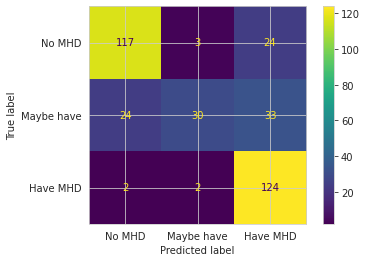

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_7, display_labels=['No MHD','Maybe have', 'Have MHD'])

In [ ]:
# Get the probabilities for the three classes/possible outputs (No MHD, Maybe, Have MHD)
search_3.predict_proba(X_test)

array([[0.57236867, 0.35820781, 0.06942352],
       [0.31567883, 0.53863327, 0.1456879 ],
       [0.08469254, 0.17406981, 0.74123765],
       ...,
       [0.18173951, 0.35646076, 0.46179974],
       [0.21309752, 0.34335184, 0.44355065],
       [0.10355515, 0.14384429, 0.75260055]])

In [ ]:
search_3.predict_proba(X_test.iloc[:1,:])

array([[0.57236867, 0.35820781, 0.06942352]])

(array([0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
 <a list of 9 Text major ticklabel objects>)

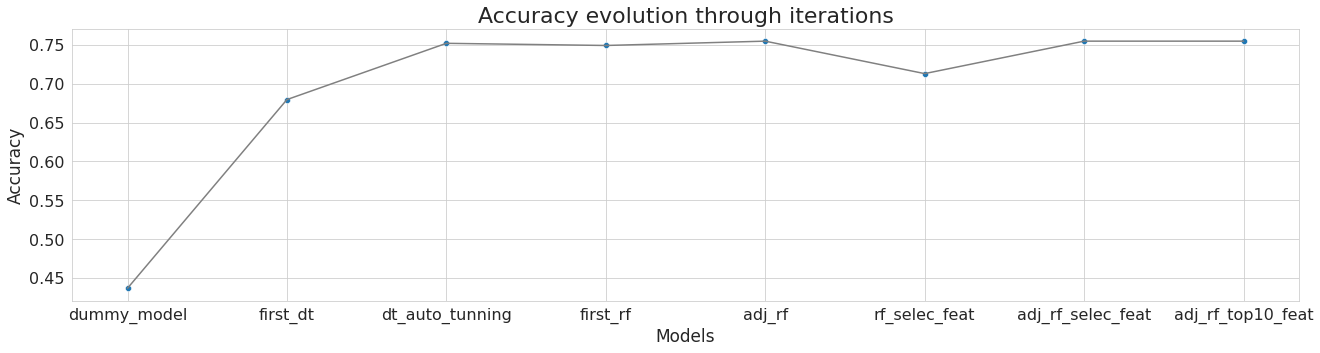

In [ ]:
results = {
    'dummy_model':acc_dummy, 
    'first_dt':dtc_accuracy, 
    'dt_auto_tunning':dtc_accuracy_2,
    'first_rf':accuracy_3,
    'adj_rf':accuracy_4,
    'rf_selec_feat':accuracy_5,
    'adj_rf_selec_feat':accuracy_6,
    'adj_rf_top10_feat':accuracy_7
}

results_df = pd.DataFrame({
    'iteration':results.keys(),
    'result':results.values()
})
plt.subplots(figsize=(22, 5))
sns.lineplot(data=results_df, x='iteration', y='result', color='grey')
sns.scatterplot(data=results_df, x='iteration', y='result')
plt.title('Accuracy evolution through iterations', size=22)
plt.xlabel('Models', size=17)
plt.ylabel('Accuracy', size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig('Accuracy_evolution.png',dpi=300, bbox_inches="tight")

We are going to use the last model (Iteration 7) for building our app since it uses only 10 predefined questions and still shows very good accuracy

# 13 Create a clean pipeline

In [98]:
# Create a df with the top 10 selected features
df_top_10 = df_for_ML_3.copy()

df_top_10 = df_top_10.filter(['age',
                             'mhd_in_the_past',
                             'mhd_coworkers_discussion',
                             'mhd_diagnosis',
                             'gender',
                             'mhd_family_history',
                             'mhd_interview',
                             'prev_employer_mhd_seriousness',
                             'mhd_unsupportive_response',
                             'mh_work_interfere'
                             ])

### 13.1 Create a new train/test split from the df with top 10 selected features

In [ ]:
X_top_10 = df_top_10
y_two = df_for_ML_3.filter(['mhd_currently'])

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top_10, y_two, train_size=.75, random_state=8)

### 13.2 Pipleine

In [ ]:
# numerical and categorical pipelines
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median'))                              
    #('scale', MinMaxScaler())  # scale the numerical columns
])

nominal_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(drop='first', sparse=False))  # Dummify the nominal categ features
])

ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())  # Dummify the ordinal categ features
])

# column selection
num_feat = list(X_top_10[numerical_cats_selected])
nom_cat_feat = list(X_top_10[nominal_cats_selected])
ord_cat_feat = list(X_top_10[ordinal_cats_selected])


full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_feat), 
    ('nom_category', nominal_pipeline, nom_cat_feat),
    ('ord_category', ordinal_pipeline, ord_cat_feat)
])

# The parameters are taken by the previous cv (Iteration 7) which defined them
param_grid = {
    'criterion': 'entropy',
    'max_depth': 7,
    'min_samples_leaf': 8,
    'min_samples_split': 8
    }

# adding the model to the pipeline
classifier = Pipeline(steps=[
    ('preprocessor', full_processor), 
    ('model', RandomForestClassifier(**param_grid))
])

# train the model
_ = classifier.fit(X_train_new, y_train_new)
accuracy_score(classifier.predict(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.7728119180633147

In [ ]:
# Test and evaluate
preds = classifier.predict(X_test_new)

accuracy = accuracy_score(y_test_new, preds)
accuracy

0.754874651810585

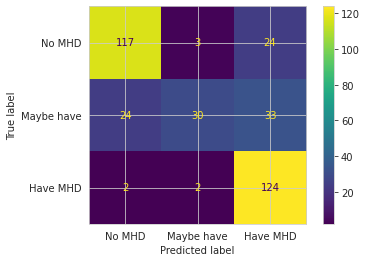

In [ ]:
evaluate = ConfusionMatrixDisplay.from_predictions(y_test_new, preds, display_labels=['No MHD','Maybe have', 'Have MHD'])
evaluate
#evaluate.savefig('Accuracy.png',dpi=300, bbox_inches="tight")

In [ ]:
# Get the probabilities for the three classes/possible outputs (No MHD, Maybe, Have MHD)
classifier.predict_proba(X_test_new)

array([[0.55104894, 0.36708433, 0.08186674],
       [0.28057418, 0.5941358 , 0.12529001],
       [0.07374343, 0.14823978, 0.77801679],
       ...,
       [0.21413467, 0.35236961, 0.43349572],
       [0.24149491, 0.3210881 , 0.43741699],
       [0.09629161, 0.13880072, 0.76490767]])

In [ ]:
classifier.predict_proba(X_test_new.iloc[:1,:])

array([[0.55104894, 0.36708433, 0.08186674]])

# 14 Testing the saved model

In [ ]:
# store the trained pipeline
import pickle
pickle.dump(classifier, 
            open(file='new_classifier_rf.sav', 
                 mode='wb'))

### 14.1 Test the saved model

In [ ]:
X_test_new

,age,mhd_in_the_past,mhd_coworkers_discussion,mhd_diagnosis,gender,mhd_family_history,mhd_interview,prev_employer_mhd_seriousness,mhd_unsupportive_response,mh_work_interfere
145,40,Maybe,Maybe,No,male,I don't know,No,I don't know,No,Not applicable to me
623,43,Maybe,Maybe,No,female,No,No,Some did,"Yes, I observed",Sometimes
282,20,Yes,No,Yes,female,Yes,No,Some did,No,Sometimes
131,45,Yes,Maybe,Yes,male,I don't know,No,None did,"Yes, I observed",Often
611,38,Maybe,Yes,No,male,No,No,I don't know,No,Sometimes
...,...,...,...,...,...,...,...,...,...,...
286,44,Yes,Maybe,Yes,female,Yes,No,Some did,"Yes, I experienced",Often
1406,26,Yes,No,Yes,female,Yes,No,None did,"Yes, I observed",Often
785,26,Yes,Yes,No,male,I don't know,Maybe,I don't know,No,Often
1022,34,Yes,Yes,No,female,No,Maybe,Some did,"Yes, I observed",Sometimes


In [ ]:
# create a list with the answers of entrie 1 (from X_test_new) to test if the saved trained model
#('classifier_rf') will give the same result as in the last pipeline
First_answers = [40, 'Maybe', 'Maybe', 'No', 'male', "I don't know", 'No', "I don't know", 'No', 'Not applicable to me']

#changing the input data to numpy array
input_data = np.asarray(First_answers)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1,-1)

In [ ]:
# Loading the saved model
loaded_model = pickle.load(open('new_classifier_rf.sav', 'rb'))

In [ ]:
ordinal_cats_selected = ['prev_employer_mhd_seriousness',
                'mhd_unsupportive_response',
                'mh_work_interfere']

nominal_cats_selected = ['mhd_in_the_past',
                'mhd_coworkers_discussion',
                'mhd_diagnosis',
                'gender',
                'mhd_family_history',
                'mhd_interview']                  

numerical_cats_selected = ['age']

In [ ]:
df_input_data = pd.DataFrame({
                              'age':[40],
                              'mhd_in_the_past':['Maybe'],
                              'mhd_coworkers_discussion':['Maybe'],
                              'mhd_diagnosis':['No'],
                              'gender':['male'],
                              'mhd_family_history':["I don't know"],
                              'mhd_interview':['No'],
                              'prev_employer_mhd_seriousness':["I don't know"],
                              'mhd_unsupportive_response':['No'],
                              'mh_work_interfere':['Not applicable to me']
    
})

In [ ]:
loaded_model.predict(df_input_data)

array([0])

In [ ]:
# Get the probabilities for the three classes/possible outputs (No MHD, Maybe, Have MHD)
loaded_model.predict_proba(df_input_data)

array([[0.55104894, 0.36708433, 0.08186674]])

The predicted probabiities are exactly the same as the ones from the last pipeline (section 13.2). So Our trained model ('classifier_rf') is ready to be used in the app

# 15 Train the model on the whole data set and save it for the Streamlit App

### 15.1 Create a DF

In [103]:
X_train_full_data = df_top_10.copy()
X_train_full_data.head()

,age,mhd_in_the_past,mhd_coworkers_discussion,mhd_diagnosis,gender,mhd_family_history,mhd_interview,prev_employer_mhd_seriousness,mhd_unsupportive_response,mh_work_interfere
0,39,Yes,Maybe,Yes,male,No,Maybe,I don't know,No,Not applicable to me
1,29,Yes,Maybe,Yes,male,Yes,No,Some did,No,Sometimes
2,38,Maybe,Maybe,No,male,No,Yes,I don't know,Maybe/Not sure,Not applicable to me
3,43,Yes,Maybe,Yes,male,No,Maybe,I don't know,No,Sometimes
4,43,Yes,Maybe,Yes,female,Yes,No,Some did,"Yes, I experienced",Sometimes


In [104]:
# Replace "I don't know" with 'I do not know' since the first one gives problems with Streamlit
X_train_full_data = X_train_full_data.replace("I don't know" ,'I do not know')
X_train_full_data.head()

,age,mhd_in_the_past,mhd_coworkers_discussion,mhd_diagnosis,gender,mhd_family_history,mhd_interview,prev_employer_mhd_seriousness,mhd_unsupportive_response,mh_work_interfere
0,39,Yes,Maybe,Yes,male,No,Maybe,I do not know,No,Not applicable to me
1,29,Yes,Maybe,Yes,male,Yes,No,Some did,No,Sometimes
2,38,Maybe,Maybe,No,male,No,Yes,I do not know,Maybe/Not sure,Not applicable to me
3,43,Yes,Maybe,Yes,male,No,Maybe,I do not know,No,Sometimes
4,43,Yes,Maybe,Yes,female,Yes,No,Some did,"Yes, I experienced",Sometimes


In [105]:
# Get all the unique values for each column
pd.Series({c: X_train_full_data[c].unique() for c in X_train_full_data})

age                              [39, 29, 38, 43, 42, 30, 37, 44, 28, 34, 35, 5...
mhd_in_the_past                                                   [Yes, Maybe, No]
mhd_coworkers_discussion                                          [Maybe, Yes, No]
mhd_diagnosis                                                            [Yes, No]
gender                                                      [male, female, others]
mhd_family_history                                        [No, Yes, I do not know]
mhd_interview                                                     [Maybe, No, Yes]
prev_employer_mhd_seriousness    [I do not know, Some did, None did, Yes, they ...
mhd_unsupportive_response        [No, Maybe/Not sure, Yes, I experienced, Yes, ...
mh_work_interfere                [Not applicable to me, Sometimes, Often, Rarel...
dtype: object

In [106]:
y_train_full_data= df_for_ML_3.filter(['mhd_currently'])

### 15.2 Pipeline for the App

In [107]:
# numerical and categorical pipelines
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median'))                              
    #('scale', MinMaxScaler())  # scale the numerical columns
])

nominal_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(drop='first', sparse=False))  # Dummify the nominal categ features
])

ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())  # Dummify the ordinal categ features
])

# column selection
num_feat = list(X_train_full_data[numerical_cats_selected])
nom_cat_feat = list(X_train_full_data[nominal_cats_selected])
ord_cat_feat = list(X_train_full_data[ordinal_cats_selected])


full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_feat), 
    ('nom_category', nominal_pipeline, nom_cat_feat),
    ('ord_category', ordinal_pipeline, ord_cat_feat)
])

# The parameters are taken by the previous cv (Iteration 7) which defined them
param_grid = {
    'criterion': 'entropy',
    'max_depth': 7,
    'min_samples_leaf': 8,
    'min_samples_split': 8
    }

# adding the model to the pipeline
classifier = Pipeline(steps=[
    ('preprocessor', full_processor), 
    ('model', RandomForestClassifier(**param_grid))
])

# train the model
_ = classifier.fit(X_train_full_data, y_train_full_data)
accuracy_score(classifier.predict(X_train_full_data), y_train_full_data)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.7745987438939288

In [108]:
# store the trained model
import pickle
pickle.dump(classifier, 
            open(file='mhd_classifier_rf.sav', 
                 mode='wb'))